In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')


In [2]:
eci_2014 = pd.read_csv('LS Election 2014.csv')
eci_2014.head()

state   pc_name         candidate sex   age category party  \
0  Telangana  Adilabad      Godam Nagesh   M  49.0       ST   TRS   
1  Telangana  Adilabad            Naresh   M  37.0       ST   INC   
2  Telangana  Adilabad     Ramesh Rathod   M  48.0       ST   TDP   
3  Telangana  Adilabad   Rathod Sadashiv   M  55.0       ST   BSP   
4  Telangana  Adilabad  Nethawath Ramdas   M  44.0       ST   IND   

     party_symbol  general_votes  postal_votes  total_votes  total_electors  
0             Car         425762          5085       430847         1386282  
1            Hand         257994          1563       259557         1386282  
2         Bicycle         182879          1319       184198         1386282  
3        Elephant          94363            57        94420         1386282  
4  Auto- Rickshaw          41028             4        41032         1386282

In [3]:
eci_2019 = pd.read_csv('LS Election 2019.csv')
eci_2019.head()

state pc_name                                          candidate  \
0  Andhra Pradesh   Araku                                Kishore Chandra Deo   
1  Andhra Pradesh   Araku  Dr. Kosuri Kasi Viswanadha Veera Venkata Satya...   
2  Andhra Pradesh   Araku                                   Goddeti. Madhavi   
3  Andhra Pradesh   Araku                             Shruti Devi Vyricherla   
4  Andhra Pradesh   Araku                                Gangulaiah Vampuru.   

      sex   age category  party   party_symbol  general_votes  postal_votes  \
0    MALE  72.0       ST    TDP        Bicycle         336163          1938   
1    MALE  54.0       ST    BJP          Lotus          17578           289   
2  FEMALE  26.0       ST  YSRCP    Ceiling Fan         557561          4629   
3  FEMALE  46.0       ST    INC           Hand          17656            74   
4    MALE  49.0       ST    JnP  Glass Tumbler          42245           549   

   total_votes  total_electors  
0       338101         1451418  
1        17867         1451418  
2       562190         1451418  
3        17730         1451418  
4        42794         1451418

In [4]:
eci_2014.shape

(8355, 12)

In [5]:
eci_2019.shape

(8597, 12)

In [6]:
eci_2014.isnull().sum()

state               0
pc_name             0
candidate           0
sex               510
age               510
category          510
party               0
party_symbol        0
general_votes       0
postal_votes        0
total_votes         0
total_electors      0
dtype: int64

In [7]:
eci_2019.isnull().sum()

state               0
pc_name             0
candidate           0
sex               543
age               543
category          543
party               0
party_symbol      543
general_votes       0
postal_votes        0
total_votes         0
total_electors      0
dtype: int64

In [8]:
eci_2014[eci_2014['age'].isnull()].head(2)

state     pc_name          candidate  sex  age category party  \
8   Telangana    Adilabad  None Of The Above  NaN  NaN      NaN  NOTA   
26  Telangana  Peddapalle  None Of The Above  NaN  NaN      NaN  NOTA   

   party_symbol  general_votes  postal_votes  total_votes  total_electors  
8          NOTA          17021            63        17084         1386282  
26         NOTA           5344            17         5361         1425355

In [9]:
eci_2019[eci_2019['age'].isnull()].head(2)

state     pc_name candidate  sex  age category party  \
10  Andhra Pradesh       Araku      Nota  NaN  NaN      NaN  NOTA   
20  Andhra Pradesh  Srikakulam      Nota  NaN  NaN      NaN  NOTA   

   party_symbol  general_votes  postal_votes  total_votes  total_electors  
10          NaN          47955            22        47977         1451418  
20          NaN          25500            45        25545         1553860

In [10]:
eci_2014.duplicated().sum()

0

In [11]:
eci_2019.duplicated().sum()

0

In [12]:
eci_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           8355 non-null   object 
 1   pc_name         8355 non-null   object 
 2   candidate       8355 non-null   object 
 3   sex             7845 non-null   object 
 4   age             7845 non-null   float64
 5   category        7845 non-null   object 
 6   party           8355 non-null   object 
 7   party_symbol    8355 non-null   object 
 8   general_votes   8355 non-null   int64  
 9   postal_votes    8355 non-null   int64  
 10  total_votes     8355 non-null   int64  
 11  total_electors  8355 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 783.4+ KB


In [13]:
eci_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           8597 non-null   object 
 1   pc_name         8597 non-null   object 
 2   candidate       8597 non-null   object 
 3   sex             8054 non-null   object 
 4   age             8054 non-null   float64
 5   category        8054 non-null   object 
 6   party           8597 non-null   object 
 7   party_symbol    8054 non-null   object 
 8   general_votes   8597 non-null   int64  
 9   postal_votes    8597 non-null   int64  
 10  total_votes     8597 non-null   int64  
 11  total_electors  8597 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 806.1+ KB


In [14]:
eci_2014.describe()

age  general_votes  postal_votes    total_votes  total_electors
count  7845.000000    8355.000000   8355.000000    8355.000000    8.355000e+03
mean     47.135883   62132.985398    107.407660   62240.393058    1.574132e+06
std      11.902487  140261.650370    436.090305  140535.827087    2.711797e+05
min      25.000000     105.000000      0.000000     105.000000    4.992200e+04
25%      38.000000    1708.000000      0.000000    1708.500000    1.446478e+06
50%      46.000000    4350.000000      1.000000    4354.000000    1.578125e+06
75%      56.000000   14881.000000     13.000000   14886.000000    1.718414e+06
max      93.000000  859973.000000   6792.000000  863358.000000    3.183083e+06

In [15]:
eci_2019.describe()

age  general_votes  postal_votes   total_votes  total_electors
count  8054.000000   8.597000e+03   8597.000000  8.597000e+03    8.597000e+03
mean     47.065185   7.117290e+04    267.469699  7.144037e+04    1.705181e+06
std      12.140434   1.735669e+05    929.319680  1.742342e+05    2.969405e+05
min      24.000000   8.400000e+01      0.000000  8.400000e+01    5.518900e+04
25%      38.000000   1.315000e+03      1.000000  1.317000e+03    1.553385e+06
50%      46.000000   3.341000e+03      4.000000  3.350000e+03    1.703279e+06
75%      56.000000   1.239100e+04     36.000000  1.242100e+04    1.856791e+06
max      90.000000   1.066824e+06  19367.000000  1.068569e+06    3.150313e+06

In [16]:
eci_2014.nunique()

state               34
pc_name            508
candidate         7560
sex                  3
age                 62
category             4
party              453
party_symbol       131
general_votes     6434
postal_votes       796
total_votes       6476
total_electors     510
dtype: int64

In [17]:
eci_2019.nunique()

state               36
pc_name            540
candidate         7810
sex                  3
age                 63
category             3
party              674
party_symbol       250
general_votes     6233
postal_votes      1227
total_votes       6246
total_electors     543
dtype: int64

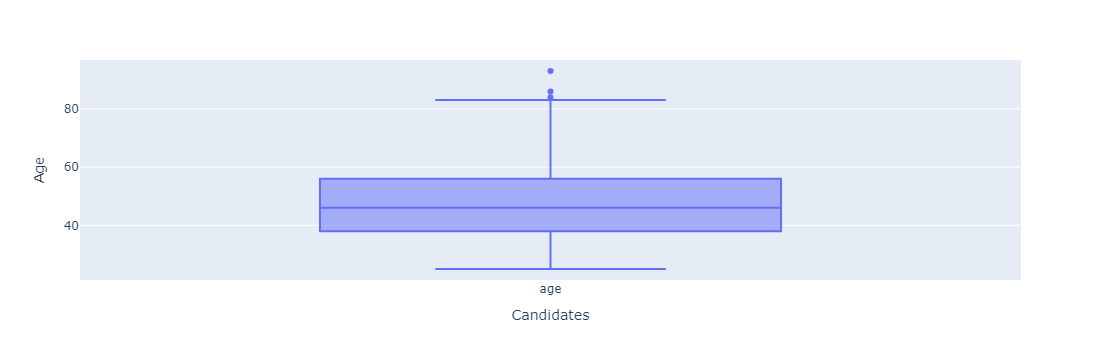

In [18]:
fig = px.box(eci_2014['age'])
fig.update_xaxes(title_text="Candidates")
fig.update_yaxes(title_text="Age")
fig.show()

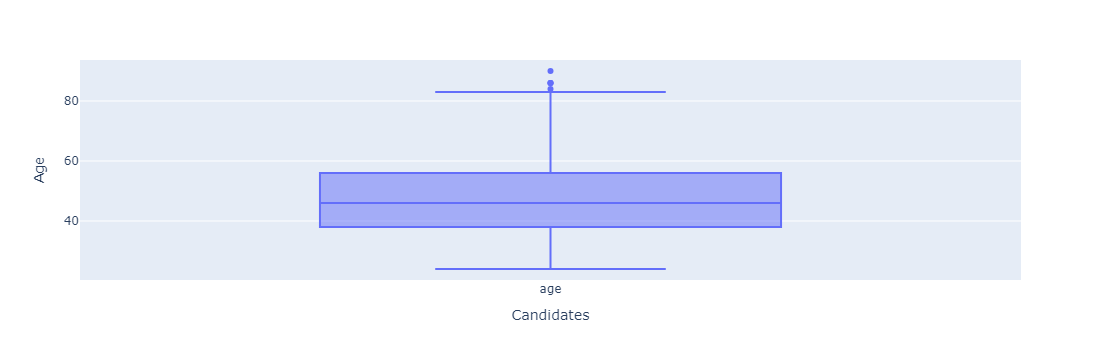

In [19]:
fig = px.box(eci_2019['age'])
fig.update_xaxes(title_text="Candidates")
fig.update_yaxes(title_text="Age")
fig.show()

## Questions

### List top 5 / bottom 5 constituencies of 2014 and 2019 in terms of voter turnout ratio?

In [22]:
eci_2014.head()

state   pc_name         candidate sex   age category party  \
0  Telangana  Adilabad      Godam Nagesh   M  49.0       ST   TRS   
1  Telangana  Adilabad            Naresh   M  37.0       ST   INC   
2  Telangana  Adilabad     Ramesh Rathod   M  48.0       ST   TDP   
3  Telangana  Adilabad   Rathod Sadashiv   M  55.0       ST   BSP   
4  Telangana  Adilabad  Nethawath Ramdas   M  44.0       ST   IND   

     party_symbol  general_votes  postal_votes  total_votes  total_electors  
0             Car         425762          5085       430847         1386282  
1            Hand         257994          1563       259557         1386282  
2         Bicycle         182879          1319       184198         1386282  
3        Elephant          94363            57        94420         1386282  
4  Auto- Rickshaw          41028             4        41032         1386282

In [23]:
df1_2014 = eci_2014.groupby(['state','pc_name','total_electors'])['total_votes'].sum().reset_index()
df1_2014.head(5)

state                    pc_name  total_electors  \
0  Andaman & Nicobar Islands  Andaman & Nicobar Islands          269360   
1             Andhra Pradesh                 Amalapuram         1357865   
2             Andhra Pradesh                 Anakapalli         1401474   
3             Andhra Pradesh                  Anantapur         1536894   
4             Andhra Pradesh                      Araku         1272340   

   total_votes  
0       190328  
1      1120927  
2      1148072  
3      1212145  
4       909614

In [24]:
df1_2014['Voter TurnOut'] = round(df1_2014['total_votes'] * 100 / df1_2014['total_electors'],2)
top_voter_turnout_2014 = df1_2014.sort_values(by=['Voter TurnOut'], ascending=False).head(5)
top_voter_turnout_2014

state    pc_name  total_electors  total_votes  Voter TurnOut
30         Assam     Dhubri         1550166      1369624          88.35
278     Nagaland   Nagaland         1182972      1038910          87.82
509  West Bengal     Tamluk         1527273      1337684          87.59
482  West Bengal  Bishnupur         1466921      1272070          86.72
496  West Bengal     Kanthi         1490409      1290811          86.61

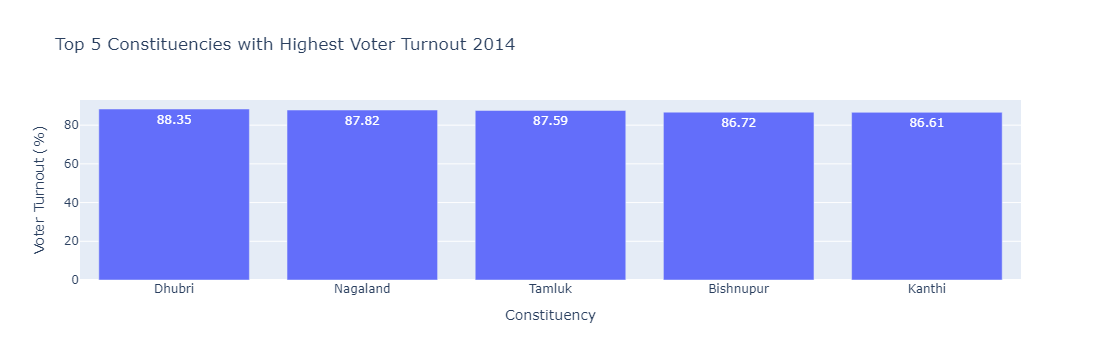

In [25]:
fig = px.bar(top_voter_turnout_2014, 
             x='pc_name', 
             y='Voter TurnOut',
             text_auto=True,
             title='Top 5 Constituencies with Highest Voter Turnout 2014',
             labels={'pc_name': 'Constituency', 'Voter TurnOut': 'Voter Turnout (%)'})

fig.show()

In [26]:
bottom_voter_turnout_2014 = df1_2014.sort_values(by=['Voter TurnOut'], ascending=False).tail(5)
bottom_voter_turnout_2014

state      pc_name  total_electors  total_votes  Voter TurnOut
69             Bihar  Patna Sahib         1946249       882262          45.33
242      Maharashtra       Kalyan         1922034       824196          42.88
128  Jammu & Kashmir    Baramulla         1190766       465992          39.13
127  Jammu & Kashmir     Anantnag         1301143       375279          28.84
131  Jammu & Kashmir     Srinagar         1207230       312212          25.86

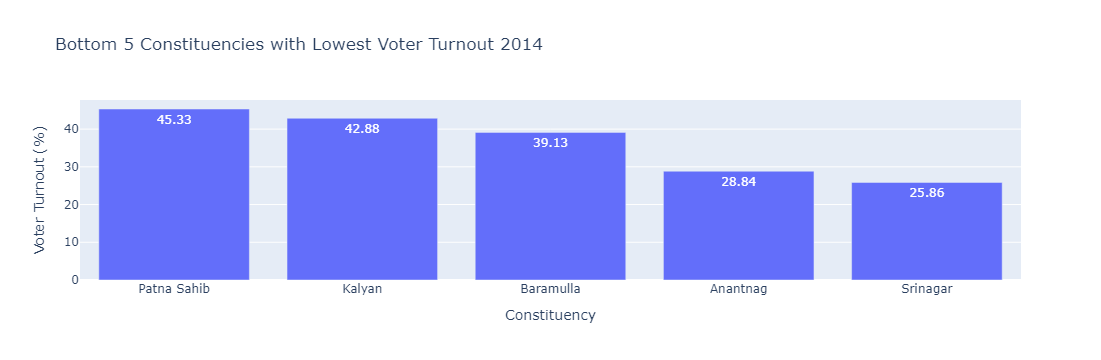

In [27]:
fig = px.bar(bottom_voter_turnout_2014, 
             x='pc_name', 
             y='Voter TurnOut',
             text_auto=True,
             title='Bottom 5 Constituencies with Lowest Voter Turnout 2014',
             labels={'pc_name': 'Constituency', 'Voter TurnOut': 'Voter Turnout (%)'})

fig.show()

In [28]:
df1_2019 = eci_2019.groupby(['state','pc_name','total_electors'])['total_votes'].sum().reset_index()
df1_2019['Voter TurnOut'] = round(df1_2019['total_votes'] * 100 / df1_2019['total_electors'],2)
top_voter_turnout_2019 = df1_2019.sort_values(by=['Voter TurnOut'], ascending=False).head(5)
top_voter_turnout_2019

state         pc_name  total_electors  total_votes  \
30               Assam          Dhubri         1858566      1685005   
514        West Bengal       Bishnupur         1627199      1420648   
29               Assam         Barpeta         1685149      1458549   
524        West Bengal      Jalpaiguri         1735464      1500922   
26   Arunachal Pradesh  Arunachal East          339788       293781   

     Voter TurnOut  
30           90.66  
514          87.31  
29           86.55  
524          86.49  
26           86.46

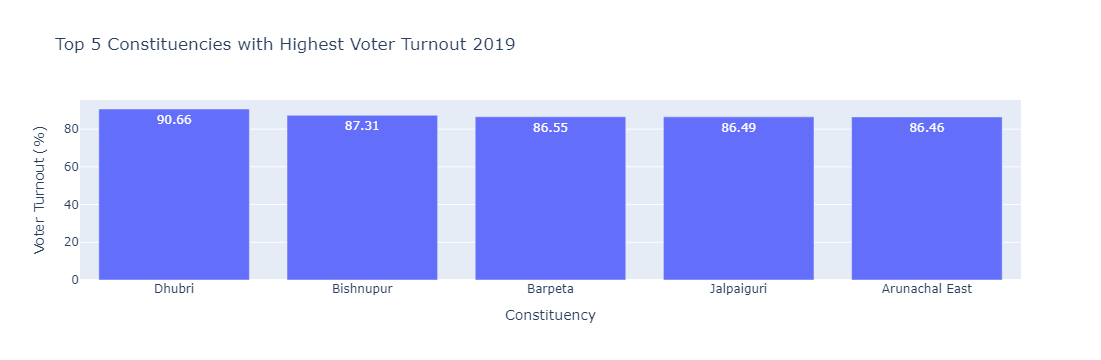

In [29]:

fig = px.bar(top_voter_turnout_2019, 
             x='pc_name', 
             y='Voter TurnOut',
             text_auto=True,
             title='Top 5 Constituencies with Highest Voter Turnout 2019',
             labels={'pc_name': 'Constituency', 'Voter TurnOut': 'Voter Turnout (%)'})

fig.show()

In [30]:
bottom_voter_turnout_2019 = df1_2019.sort_values(by=['Voter TurnOut'], ascending=False).tail(5)
bottom_voter_turnout_2019

state    pc_name  total_electors  total_votes  Voter TurnOut
253      Maharashtra     Kalyan         1965676       890313          45.29
400        Telangana  Hyderabad         1957931       877872          44.84
139  Jammu & Kashmir  Baramulla         1317738       455550          34.57
142  Jammu & Kashmir   Srinagar         1294671       186832          14.43
138  Jammu & Kashmir   Anantnag         1397779       124896           8.94

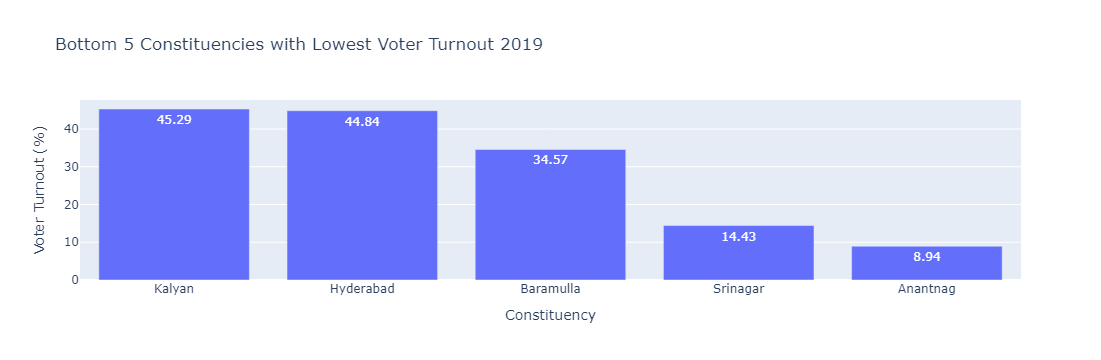

In [31]:
fig = px.bar(bottom_voter_turnout_2019, 
             x='pc_name', 
             y='Voter TurnOut',
             text_auto=True,
             title='Bottom 5 Constituencies with Lowest Voter Turnout 2019',
             labels={'pc_name': 'Constituency', 'Voter TurnOut': 'Voter Turnout (%)'})

fig.show()

### List top 5 / bottom 5 states of 2014 and 2019 in terms of voter turnout ratio?

In [33]:
eci_2014.head()

state   pc_name         candidate sex   age category party  \
0  Telangana  Adilabad      Godam Nagesh   M  49.0       ST   TRS   
1  Telangana  Adilabad            Naresh   M  37.0       ST   INC   
2  Telangana  Adilabad     Ramesh Rathod   M  48.0       ST   TDP   
3  Telangana  Adilabad   Rathod Sadashiv   M  55.0       ST   BSP   
4  Telangana  Adilabad  Nethawath Ramdas   M  44.0       ST   IND   

     party_symbol  general_votes  postal_votes  total_votes  total_electors  
0             Car         425762          5085       430847         1386282  
1            Hand         257994          1563       259557         1386282  
2         Bicycle         182879          1319       184198         1386282  
3        Elephant          94363            57        94420         1386282  
4  Auto- Rickshaw          41028             4        41032         1386282

In [34]:
df2_2014 = eci_2014.groupby(['state','pc_name','total_electors'])['total_votes'].sum().reset_index()
df2_2014.head(5)

state                    pc_name  total_electors  \
0  Andaman & Nicobar Islands  Andaman & Nicobar Islands          269360   
1             Andhra Pradesh                 Amalapuram         1357865   
2             Andhra Pradesh                 Anakapalli         1401474   
3             Andhra Pradesh                  Anantapur         1536894   
4             Andhra Pradesh                      Araku         1272340   

   total_votes  
0       190328  
1      1120927  
2      1148072  
3      1212145  
4       909614

In [35]:
df2_2014 = df2_2014.groupby(['state'])[['total_votes','total_electors']].sum().reset_index()
df2_2014['Voter TurnOut'] = round(df2_2014['total_votes'] * 100 / df2_2014['total_electors'],2)
df2_2014.head()

state  total_votes  total_electors  Voter TurnOut
0  Andaman & Nicobar Islands       190328          269360          70.66
1             Andhra Pradesh     28934993        36760884          78.71
2          Arunachal Pradesh       596956          759344          78.61
3                      Assam     15085883        18837713          80.08
4                      Bihar     35885332        63800160          56.25

In [36]:
df2_2014 = df2_2014.sort_values(by=['Voter TurnOut'], ascending=False)
top_state_voter_turnout_2014 = df2_2014.head(5)
top_state_voter_turnout_2014

state  total_votes  total_electors  Voter TurnOut
22              Nagaland      1038910         1182972          87.82
16           Lakshadweep        43239           49922          86.61
30               Tripura      2023829         2388822          84.72
6   Dadra & Nagar Haveli       165286          196597          84.07
27                Sikkim       308967          370770          83.33

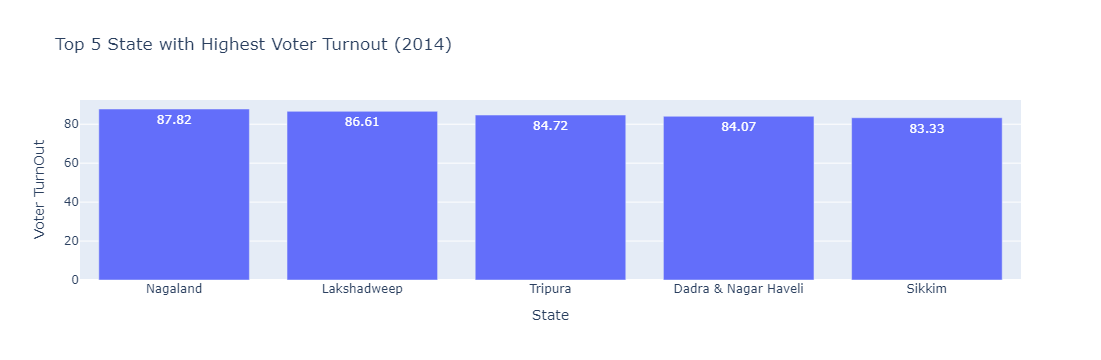

In [37]:
fig = px.bar(top_state_voter_turnout_2014, 
             x='state', 
             y='Voter TurnOut', 
             title='Top 5 State with Highest Voter Turnout (2014)',
             text_auto=True,
             labels={'state': 'State', 'Voter Turn Out': 'Voter Turnout (%)'})

fig.show()

In [38]:
bottom_state_voter_turnout_2014 = df2_2014.tail(5)
bottom_state_voter_turnout_2014

state  total_votes  total_electors  Voter TurnOut
17   Madhya Pradesh     29639807        48121301          61.59
18      Maharashtra     48717419        80798823          60.29
31    Uttar Pradesh     81093120       138810557          58.42
4             Bihar     35885332        63800160          56.25
12  Jammu & Kashmir      3566863         7183129          49.66

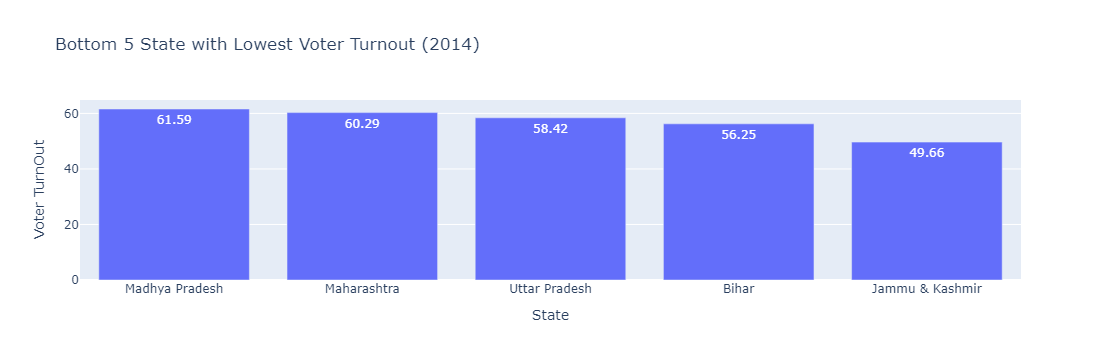

In [39]:
fig = px.bar(bottom_state_voter_turnout_2014, 
             x='state', 
             y='Voter TurnOut', 
             title='Bottom 5 State with Lowest Voter Turnout (2014)',
             text_auto=True,
             labels={'state': 'State', 'Voter Turn Out': 'Voter Turnout (%)'})

fig.show()

In [40]:
df2_2019 = eci_2019.groupby(['state','pc_name','total_electors'])['total_votes'].sum().reset_index()
df2_2019 = df2_2019.groupby(['state'])[['total_votes','total_electors']].sum().reset_index()
df2_2019['Voter TurnOut'] = round(df2_2019['total_votes'] * 100 / df2_2019['total_electors'],2)
df2_2019 = df2_2019.sort_values(by=['Voter TurnOut'], ascending=False)
top_state_voter_turnout_2019 = df2_2019.head(5)
top_state_voter_turnout_2019

state  total_votes  total_electors  Voter TurnOut
17  Lakshadweep        47009           55189          85.18
23     Nagaland      1006357         1213777          82.91
20      Manipur      1617330         1959563          82.54
32      Tripura      2153172         2614718          82.35
35  West Bengal     57206976        70001284          81.72

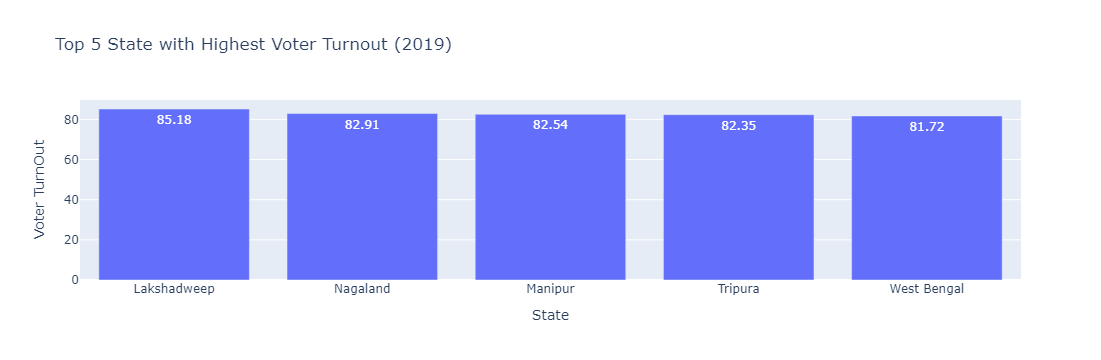

In [41]:
fig = px.bar(top_state_voter_turnout_2019, 
             x='state', 
             y='Voter TurnOut', 
             title='Top 5 State with Highest Voter Turnout (2019)',
             text_auto=True,
             labels={'state': 'State', 'Voter Turn Out': 'Voter Turnout (%)'})

fig.show()

In [42]:
bottom_state_voter_turnout_2019 = df2_2019.tail(5)
bottom_state_voter_turnout_2019

state  total_votes  total_electors  Voter TurnOut
19      Maharashtra     54054245        88676946          60.96
24     Nct Of Delhi      8679012        14327649          60.58
33    Uttar Pradesh     86481398       146134603          59.18
4             Bihar     40806661        71216290          57.30
13  Jammu & Kashmir      3552622         7922538          44.84

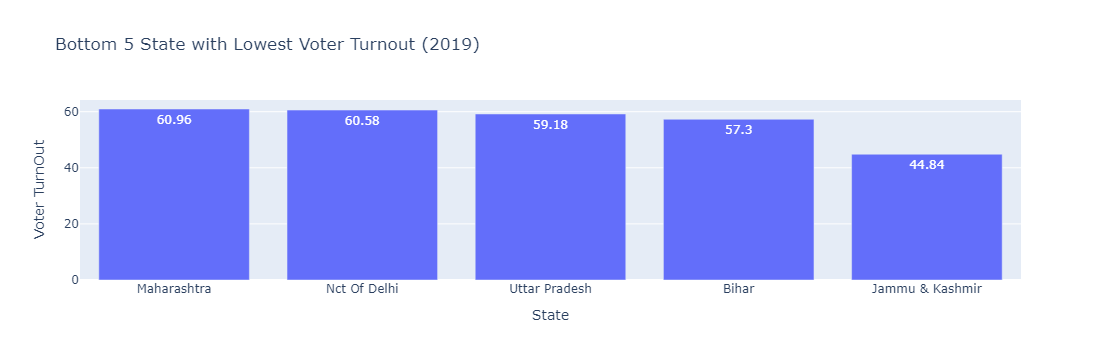

In [43]:
fig = px.bar(bottom_state_voter_turnout_2019, 
             x='state', 
             y='Voter TurnOut', 
             title='Bottom 5 State with Lowest Voter Turnout (2019)',
             text_auto=True,
             labels={'state': 'State', 'Voter Turn Out': 'Voter Turnout (%)'})

fig.show()

### Which constituencies have elected the same party for two consecutive elections, rank them by % of votes to that winning party in 2019

In [45]:
pc_tv_2014 = eci_2014.groupby(['state','pc_name'])['total_votes'].sum().reset_index(name='all_votes_14')
pc_tv_2014.sample(5)

state          pc_name  all_votes_14
10   Andhra Pradesh           Kadapa       1200662
303       Rajasthan           Barmer       1219119
495     West Bengal         Jhargram       1257613
277         Mizoram          Mizoram        433201
291          Punjab  Fatehgarh Sahib       1030954

In [46]:
pc_tv_2019 = eci_2019.groupby(['state','pc_name'])['total_votes'].sum().reset_index(name='all_votes')
pc_tv_2019.sample(5)

state         pc_name  all_votes
364      Tamil Nadu      Coimbatore    1250885
519     West Bengal         Dum Dum    1204660
224  Madhya Pradesh        Mandsour    1370667
238     Maharashtra        Amravati    1112385
98          Gujarat  Ahmedabad East    1116367

In [47]:
eci_2014['vote_rank'] = eci_2014.groupby(['state', 'pc_name'])['total_votes'].rank(method='dense', ascending=False)

eci_2014.head()

state   pc_name         candidate sex   age category party  \
0  Telangana  Adilabad      Godam Nagesh   M  49.0       ST   TRS   
1  Telangana  Adilabad            Naresh   M  37.0       ST   INC   
2  Telangana  Adilabad     Ramesh Rathod   M  48.0       ST   TDP   
3  Telangana  Adilabad   Rathod Sadashiv   M  55.0       ST   BSP   
4  Telangana  Adilabad  Nethawath Ramdas   M  44.0       ST   IND   

     party_symbol  general_votes  postal_votes  total_votes  total_electors  \
0             Car         425762          5085       430847         1386282   
1            Hand         257994          1563       259557         1386282   
2         Bicycle         182879          1319       184198         1386282   
3        Elephant          94363            57        94420         1386282   
4  Auto- Rickshaw          41028             4        41032         1386282   

   vote_rank  
0        1.0  
1        2.0  
2        3.0  
3        4.0  
4        5.0

In [48]:
df3_2014 = eci_2014[eci_2014['vote_rank']==1]
df3_2014.head()

state     pc_name               candidate sex   age category party  \
0   Telangana    Adilabad            Godam Nagesh   M  49.0       ST   TRS   
11  Telangana  Peddapalle             Balka Suman   M  31.0       SC   TRS   
31  Telangana  Karimnagar  Vinod Kumar Boinapally   M  54.0      GEN   TRS   
46  Telangana   Nizamabad     Kalvakuntla Kavitha   F  36.0      GEN   TRS   
62  Telangana   Zahirabad              B.b. Patil   M  58.0      GEN   TRS   

   party_symbol  general_votes  postal_votes  total_votes  total_electors  \
0           Car         425762          5085       430847         1386282   
11          Car         563214          2282       565496         1425355   
31          Car         503197          2161       505358         1550810   
46          Car         435706          3601       439307         1496193   
62          Car         505983          2678       508661         1445354   

    vote_rank  
0         1.0  
11        1.0  
31        1.0  
46        1.0  
62        1.0

In [49]:
eci_2019['vote_rank'] = eci_2019.groupby(['state', 'pc_name'])['total_votes'].rank(method='dense', ascending=False)

eci_2019.head()

state pc_name                                          candidate  \
0  Andhra Pradesh   Araku                                Kishore Chandra Deo   
1  Andhra Pradesh   Araku  Dr. Kosuri Kasi Viswanadha Veera Venkata Satya...   
2  Andhra Pradesh   Araku                                   Goddeti. Madhavi   
3  Andhra Pradesh   Araku                             Shruti Devi Vyricherla   
4  Andhra Pradesh   Araku                                Gangulaiah Vampuru.   

      sex   age category  party   party_symbol  general_votes  postal_votes  \
0    MALE  72.0       ST    TDP        Bicycle         336163          1938   
1    MALE  54.0       ST    BJP          Lotus          17578           289   
2  FEMALE  26.0       ST  YSRCP    Ceiling Fan         557561          4629   
3  FEMALE  46.0       ST    INC           Hand          17656            74   
4    MALE  49.0       ST    JnP  Glass Tumbler          42245           549   

   total_votes  total_electors  vote_rank  
0       338101         1451418        2.0  
1        17867         1451418        5.0  
2       562190         1451418        1.0  
3        17730         1451418        6.0  
4        42794         1451418        4.0

In [50]:
df3_2019 = eci_2019[eci_2019['vote_rank']==1]
df3_2019.head()

state        pc_name                       candidate     sex  \
2   Andhra Pradesh          Araku                Goddeti. Madhavi  FEMALE   
11  Andhra Pradesh     Srikakulam       Kinjarapu Ram Mohan Naidu    MALE   
23  Andhra Pradesh   Vizianagaram          Bellana Chandra Sekhar    MALE   
39  Andhra Pradesh  Visakhapatnam             M V V Satyanarayana    MALE   
53  Andhra Pradesh     Anakapalli  Dr.beesetti Venkata Satyavathi  FEMALE   

     age category  party party_symbol  general_votes  postal_votes  \
2   26.0       ST  YSRCP  Ceiling Fan         557561          4629   
11  32.0  GENERAL    TDP      Bicycle         529213          5331   
23  57.0  GENERAL  YSRCP  Ceiling Fan         573466          4952   
39  52.0  GENERAL  YSRCP  Ceiling Fan         433968          2938   
53  52.0  GENERAL  YSRCP  Ceiling Fan         583210          3016   

    total_votes  total_electors  vote_rank  
2        562190         1451418        1.0  
11       534544         1553860        1.0  
23       578418         1503980        1.0  
39       436906         1829300        1.0  
53       586226         1521363        1.0

In [51]:
df3 = pd.merge(df3_2014, df3_2019, on=['state','pc_name'], how='inner')
eci_14_19 = df3.copy()
df3 = df3[['state','pc_name','party_x','party_y','total_votes_y','total_electors_y']]
df3.sample(5)

state       pc_name party_x party_y  total_votes_y  \
69            Bihar        Purnia   JD(U)   JD(U)         632924   
482       Jharkhand        Chatra     BJP     BJP         528077   
135         Haryana     Faridabad     BJP     BJP         913222   
177          Kerala       Wayanad     INC     INC         706367   
30   Andhra Pradesh  Narasaraopet     TDP   YSRCP         745557   

     total_electors_y  
69            1765312  
482           1425218  
135           2071816  
177           1359679  
30            1670391

In [52]:
df3 = df3[df3['party_x']==df3['party_y']]
df3.sample(5)

state     pc_name party_x party_y  total_votes_y  total_electors_y
499   Chandigarh  Chandigarh     BJP     BJP         231188            646729
468  West Bengal      Ghatal    AITC    AITC         717959           1800002
476  West Bengal     Asansol     BJP     BJP         633378           1615865
308    Rajasthan     Udaipur     BJP     BJP         871548           2069559
187       Kerala    Kottayam  KEC(M)  KEC(M)         421046           1206698

In [53]:
df3 = pd.merge(df3, pc_tv_2019, on=['state','pc_name'], how ='inner')
df3.sample(5)

state     pc_name party_x party_y  total_votes_y  \
263     Uttar Pradesh   Kaushambi     BJP     BJP         383009   
14     Andhra Pradesh      Ongole   YSRCP   YSRCP         739202   
160       Maharashtra      Wardha     BJP     BJP         578364   
91   Himachal Pradesh    Hamirpur     BJP     BJP         682692   
294       West Bengal  Mathurapur    AITC    AITC         726828   

     total_electors_y  all_votes  
263           1787120     974438  
14            1556469    1342368  
160           1743283    1072570  
91            1362269     988765  
294           1652096    1401953

In [54]:
df3['% of Votes'] = round(df3['total_votes_y'] * 100 / df3['all_votes'],2)
df3.sample(5)

state   pc_name party_x party_y  total_votes_y  \
208       Rajasthan     Alwar     BJP     BJP         760201   
19   Andhra Pradesh  Tirupati   YSRCP   YSRCP         722877   
213       Rajasthan     Ajmer     BJP     BJP         815076   
28            Assam    Jorhat     BJP     BJP         543288   
215       Rajasthan   Jodhpur     BJP     BJP         788888   

     total_electors_y  all_votes  % of Votes  
208           1888524    1265674       60.06  
19            1650453    1313515       55.03  
213           1876346    1262214       64.58  
28            1365035    1057965       51.35  
215           1956755    1346243       58.60

In [55]:
top_10_votes = df3.sort_values(by=['% of Votes'], ascending=[False]).head(10)
top_10_votes.rename(columns={'party_x':'Party'}, inplace=True)

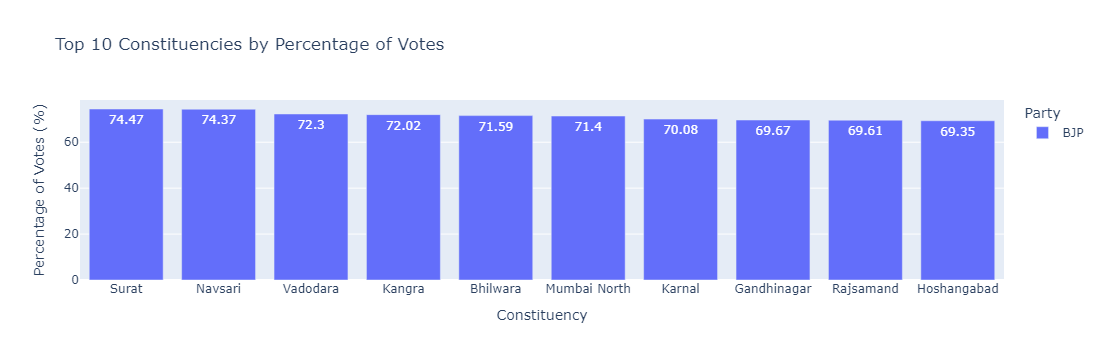

In [56]:
fig = px.bar(top_10_votes, 
             x='pc_name', 
             y='% of Votes', 
             color='Party',
             title='Top 10 Constituencies by Percentage of Votes',
             text_auto=True,
             labels={'pc_name': 'Constituency', '% of Votes': 'Percentage of Votes (%)'})

# Show the plot
fig.show()

### Which constituencies have voted for different parties in two elections (list top 10 based on difference (2019-2014) in winner vote percentage in two elections)

In [58]:
df4 = eci_14_19[eci_14_19['party_x'] != eci_14_19['party_y']]
df4 = df4[['state','pc_name','party_x','party_y','total_votes_x','total_votes_y']]
df4.sample(5)

state             pc_name party_x party_y  total_votes_x  \
355      Tripura        Tripura West     CPM     BJP         671665   
450  West Bengal             Bangaon    AITC     BJP         551213   
83         Bihar           Bhagalpur     RJD   JD(U)         367623   
475  West Bengal  Bardhaman Durgapur    AITC     BJP         554521   
235  Maharashtra          Chandrapur     BJP     INC         508049   

     total_votes_y  
355         573532  
450         687622  
83          618254  
475         598376  
235         559507

In [59]:
df4 = pd.merge(df4, pc_tv_2014, on=['state','pc_name'], how ='inner')
df4.head()

state       pc_name party_x party_y  total_votes_x  total_votes_y  \
0  Telangana      Adilabad     TRS     BJP         430847         377374   
1  Telangana    Karimnagar     TRS     BJP         505358         498276   
2  Telangana     Nizamabad     TRS     BJP         439307         480584   
3  Telangana    Malkajgiri     TDP     INC         523356         603748   
4  Telangana  Nagarkurnool     INC     TRS         420075         499672   

   all_votes_14  
0       1045839  
1       1125184  
2       1033924  
3       1620444  
4       1108968

In [60]:
df4 = pd.merge(df4, pc_tv_2019, on=['state','pc_name'], how ='inner')
df4.head()

state       pc_name party_x party_y  total_votes_x  total_votes_y  \
0  Telangana      Adilabad     TRS     BJP         430847         377374   
1  Telangana    Karimnagar     TRS     BJP         505358         498276   
2  Telangana     Nizamabad     TRS     BJP         439307         480584   
3  Telangana    Malkajgiri     TDP     INC         523356         603748   
4  Telangana  Nagarkurnool     INC     TRS         420075         499672   

   all_votes_14  all_votes  
0       1045839    1063730  
1       1125184    1147697  
2       1033924    1062768  
3       1620444    1563063  
4       1108968     989847

In [61]:
df4['2014_vtd'] = df4['total_votes_x'] * 100 / df4['all_votes_14']
df4['2019_vtd'] = df4['total_votes_y'] * 100 / df4['all_votes']
df4['% of Vote Diff'] = round(df4['2019_vtd'] - df4['2014_vtd'],2)
df4.head()

state       pc_name party_x party_y  total_votes_x  total_votes_y  \
0  Telangana      Adilabad     TRS     BJP         430847         377374   
1  Telangana    Karimnagar     TRS     BJP         505358         498276   
2  Telangana     Nizamabad     TRS     BJP         439307         480584   
3  Telangana    Malkajgiri     TDP     INC         523356         603748   
4  Telangana  Nagarkurnool     INC     TRS         420075         499672   

   all_votes_14  all_votes   2014_vtd   2019_vtd  % of Vote Diff  
0       1045839    1063730  41.196303  35.476484           -5.72  
1       1125184    1147697  44.913365  43.415292           -1.50  
2       1033924    1062768  42.489293  45.220029            2.73  
3       1620444    1563063  32.297074  38.625954            6.33  
4       1108968     989847  37.879813  50.479721           12.60

In [62]:
top_10_vote_diff = df4.sort_values(by=['% of Vote Diff'], ascending=False)[['state','pc_name','party_x','party_y','% of Vote Diff']].head(10)
top_10_vote_diff.rename(columns = {'party_x': 'Party in 2014', 'party_y': 'Party in 2019'}, inplace=True)
top_10_vote_diff

state              pc_name Party in 2014 Party in 2019  \
152    West Bengal          Alipurduars          AITC           BJP   
24           Assam  Autonomous District           INC           BJP   
128     Tamil Nadu        Kanniyakumari           BJP           INC   
174     Puducherry           Puducherry         AINRC           INC   
36           Bihar            Bhagalpur           RJD         JD(U)   
136  Uttar Pradesh              Sambhal           BJP            SP   
29           Bihar          Jhanjharpur           BJP         JD(U)   
57       Karnataka        Chikkballapur           INC           BJP   
148  Uttar Pradesh             Ghazipur           BJP           BSP   
30           Bihar               Supaul           INC         JD(U)   

     % of Vote Diff  
152           24.77  
24            22.49  
128           22.19  
174           21.70  
36            21.56  
136           21.52  
29            21.16  
57            20.15  
148           20.09  
30            19.48

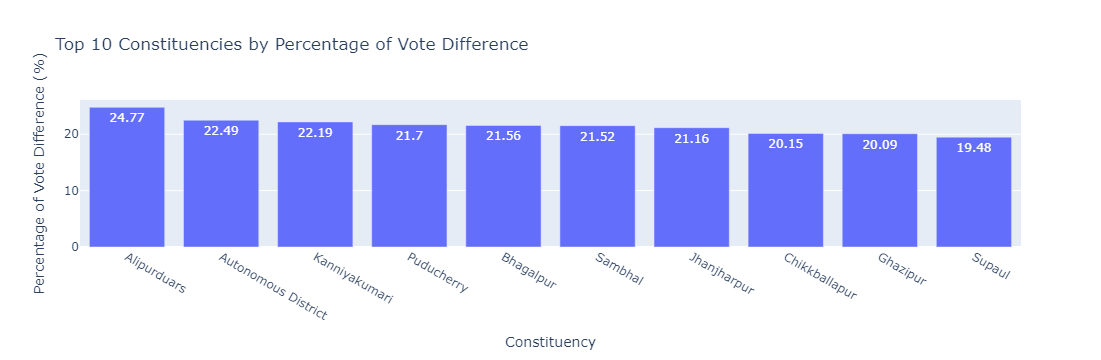

In [63]:
fig = px.bar(top_10_vote_diff, 
             x='pc_name', 
             y='% of Vote Diff', 
             hover_data=['Party in 2014', 'Party in 2019'],  # Show additional information on hover
             title='Top 10 Constituencies by Percentage of Vote Difference',
             text_auto=True,
             labels={'pc_name': 'Constituency', '% of Vote Diff': 'Percentage of Vote Difference (%)'})

fig.show()

### Top 5 candidates based on margin difference with runners in 2014 and 2019.

In [65]:
df5_2014_1 = eci_2014[eci_2014['vote_rank']==1][['state', 'pc_name','candidate','party','total_votes']]
df5_2014_1.head(6)

state     pc_name                      candidate party  total_votes
0   Telangana    Adilabad                   Godam Nagesh   TRS       430847
11  Telangana  Peddapalle                    Balka Suman   TRS       565496
31  Telangana  Karimnagar         Vinod Kumar Boinapally   TRS       505358
46  Telangana   Nizamabad            Kalvakuntla Kavitha   TRS       439307
62  Telangana   Zahirabad                     B.b. Patil   TRS       508661
73  Telangana       Medak  Kalvakuntla Chandrasekhar Rao   TRS       657492

In [66]:
df5_2014_2 = eci_2014[eci_2014['vote_rank']==2][['state', 'pc_name','candidate','party','total_votes']]
df5_2014_2.head(6)

state     pc_name                  candidate party  total_votes
1   Telangana    Adilabad                     Naresh   INC       259557
12  Telangana  Peddapalle              G. Vivekanand   INC       274338
28  Telangana  Karimnagar           Ponnam Prabhakar   INC       300706
48  Telangana   Nizamabad          Madhu Yaskhi Goud   INC       272123
65  Telangana   Zahirabad       Suresh Kumar Shetkar   INC       364030
76  Telangana       Medak  Dr.p. Shravan Kumar Reddy   INC       260463

In [67]:
df5_2014 = pd.merge(df5_2014_1, df5_2014_2, on=['state', 'pc_name'], how='inner')
df5_2014['Vote Diff'] = df5_2014['total_votes_x'] - df5_2014['total_votes_y']
df5_2014.rename(columns={'candidate_x':'Candidate', 'party_x':'Party'}, inplace=True)
top_5_vote_diff  = df5_2014.sort_values(by=['Vote Diff'], ascending=False).head(5)
top_5_vote_diff

state    pc_name                Candidate Party  total_votes_x  \
119        Gujarat   Vadodara            Narendra Modi   BJP         845464   
368  Uttar Pradesh  Ghaziabad        Vijay Kumar Singh   BJP         758482   
124        Gujarat    Navsari              C. R. Patil   BJP         820831   
296      Rajasthan     Jaipur         Ramcharan Bohara   BJP         863358   
123        Gujarat      Surat  Darshana Vikram Jardosh   BJP         718412   

                       candidate_y party_y  total_votes_y  Vote Diff  
119       Mistri Madhusudan Devram     INC         275336     570128  
368                     Raj Babbar     INC         191222     567260  
124                   Maksud Mirza     INC         262715     558116  
296               Dr. Mahesh Joshi     INC         324013     539345  
123  Desai Naishadhbhai Bhupatbhai     INC         185222     533190

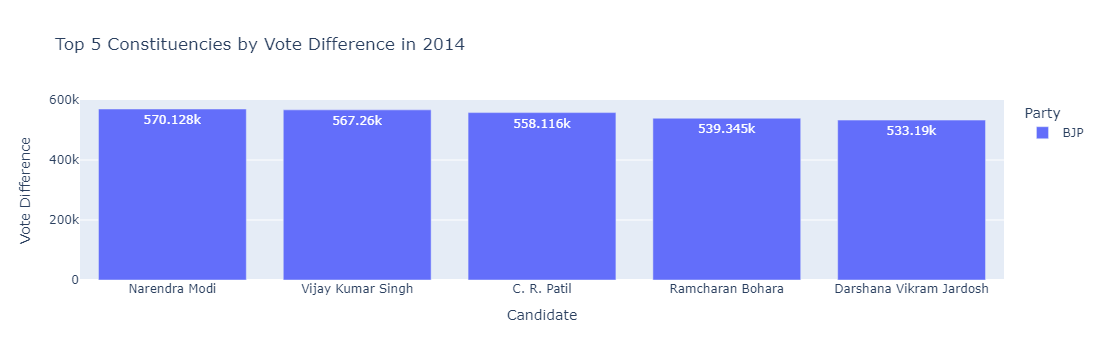

In [68]:
fig = px.bar(top_5_vote_diff, 
             x='Candidate', 
             y='Vote Diff', 
             hover_data=['Candidate'], 
             title='Top 5 Constituencies by Vote Difference in 2014',
             text_auto=True,
             color='Party',
             labels={'pc_name': 'Constituency', 'Vote Diff': 'Vote Difference'})

fig.show()

In [69]:
df5_2019_1 = eci_2019[eci_2019['vote_rank']==1][['state', 'pc_name','candidate','party','total_votes']]
df5_2019_2 = eci_2019[eci_2019['vote_rank']==2][['state', 'pc_name','candidate','party','total_votes']]
df5_2019 = pd.merge(df5_2019_1, df5_2019_2, on=['state', 'pc_name'], how='inner')
df5_2019['Vote Diff'] = df5_2019['total_votes_x'] - df5_2019['total_votes_y']
df5_2019.rename(columns={'candidate_x':'Candidate', 'party_x':'Party'}, inplace=True)
top_5_vote_diff_2019  = df5_2019.sort_values(by=['Vote Diff'], ascending=False).head(5)
top_5_vote_diff_2019

state    pc_name                Candidate Party  total_votes_x  \
107    Gujarat    Navsari              C. R. Patil   BJP         972739   
113    Haryana     Karnal            Sanjay Bhatia   BJP         911594   
118    Haryana  Faridabad              Krishan Pal   BJP         913222   
316  Rajasthan   Bhilwara  Subhash Chandra Baheria   BJP         938160   
102    Gujarat   Vadodara          Ranjanben Bhatt   BJP         883719   

                     candidate_y party_y  total_votes_y  Vote Diff  
107  Patel Dharmeshbhai Bhimbhai     INC         283071     689668  
113                Kuldip Sharma     INC         255452     656142  
118          Avtar Singh Bhadana     INC         274983     638239  
316               Ram Pal Sharma     INC         326160     612000  
102        Prashant Patel (tiko)     INC         294542     589177

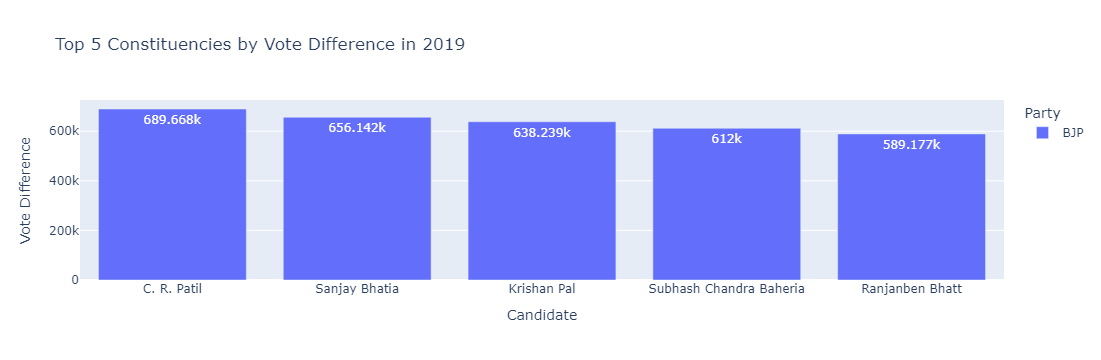

In [70]:
fig = px.bar(top_5_vote_diff_2019, 
             x='Candidate', 
             y='Vote Diff', 
             hover_data=['Candidate'], 
             title='Top 5 Constituencies by Vote Difference in 2019',
             text_auto=True,
             color='Party',
             labels={'pc_name': 'Constituency', 'Vote Diff': 'Vote Difference'})

fig.show()

### % Split of votes of parties between 2014 vs 2019 at national level

In [72]:
df6_2014 = eci_2014.groupby(['party'])['total_votes'].sum().reset_index()
df6_2014['% of all Votes'] = round(df6_2014['total_votes'] * 100 / eci_2014['total_votes'].sum(),2)
top_10_parties = df6_2014.sort_values(by='% of all Votes', ascending=False).head(10)
top_10_parties

party  total_votes  % of all Votes
80     BJP    161047761           30.97
163    INC     96641749           18.58
110    BSP     22434033            4.31
31    AITC     21215661            4.08
385     SP     18632568            3.58
17    ADMK     18111579            3.48
126    CPM     17938138            3.45
164    IND     15888094            3.06
406    TDP     14099230            2.71
428  YSRCP     13995435            2.69

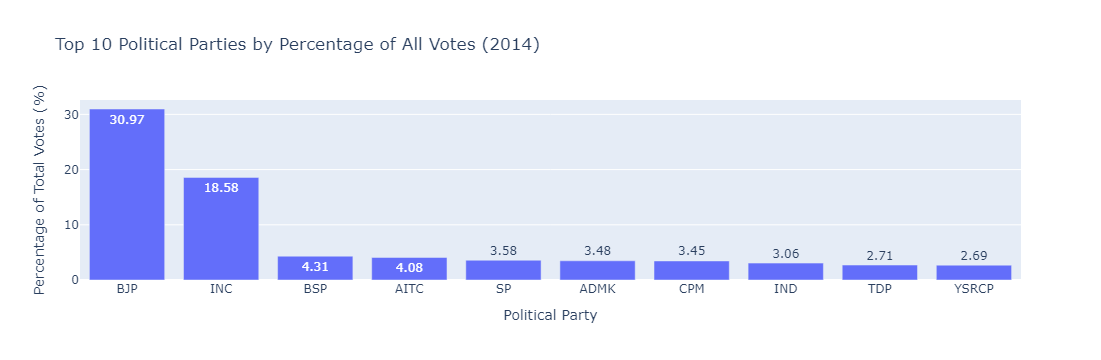

In [73]:
fig = px.bar(top_10_parties, 
             x='party', 
             y='% of all Votes', 
             title='Top 10 Political Parties by Percentage of All Votes (2014)',
             text_auto=True,
             labels={'party': 'Political Party', '% of all Votes': 'Percentage of Total Votes (%)'})

# Show the plot
fig.show()

In [74]:
df6_2019 = eci_2019.groupby(['party'])['total_votes'].sum().reset_index()
df6_2019['% of all Votes'] = round(df6_2019['total_votes'] * 100 / eci_2019['total_votes'].sum(),2)
top_10_parties_2019 = df6_2019.sort_values(by='% of all Votes', ascending=False).head(10)
top_10_parties_2019

party  total_votes  % of all Votes
126    BJP    229076879           37.30
239    INC    119495214           19.46
44    AITC     24929330            4.06
168    BSP     22246501            3.62
241    IND     16583326            2.70
579     SP     15647206            2.55
652  YSRCP     15537006            2.53
200    DMK     14363332            2.34
566    SHS     12858904            2.09
609    TDP     12515345            2.04

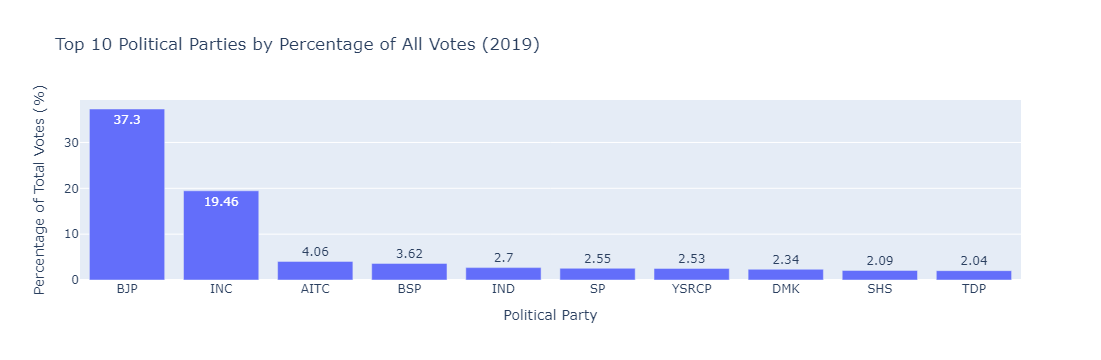

In [75]:
fig = px.bar(top_10_parties_2019, 
             x='party', 
             y='% of all Votes', 
             title='Top 10 Political Parties by Percentage of All Votes (2019)',
             text_auto=True,
             labels={'party': 'Political Party', '% of all Votes': 'Percentage of Total Votes (%)'})

# Show the plot
fig.show()

### % Split of votes of parties between 2014 vs 2019 at state level.

In [77]:
st = 'Karnataka'


In [78]:
df7_2014 = eci_2014[eci_2014['state']==st]
df7_2014 = df7_2014.groupby(['party'])['total_votes'].sum().reset_index()
x = eci_2014[eci_2014['state']==st]['total_votes'].sum()
df7_2014['% of Vote'] = round(df7_2014['total_votes'] * 100 / x,2)
top_5_parties_state_2014 = df7_2014.sort_values(by='% of Vote', ascending=False).head(5)
top_5_parties_state_2014

party  total_votes  % of Vote
6     BJP     13350285      43.01
16    INC     12666530      40.81
18  JD(S)      3406465      10.97
17    IND       483513       1.56
8     BSP       265006       0.85

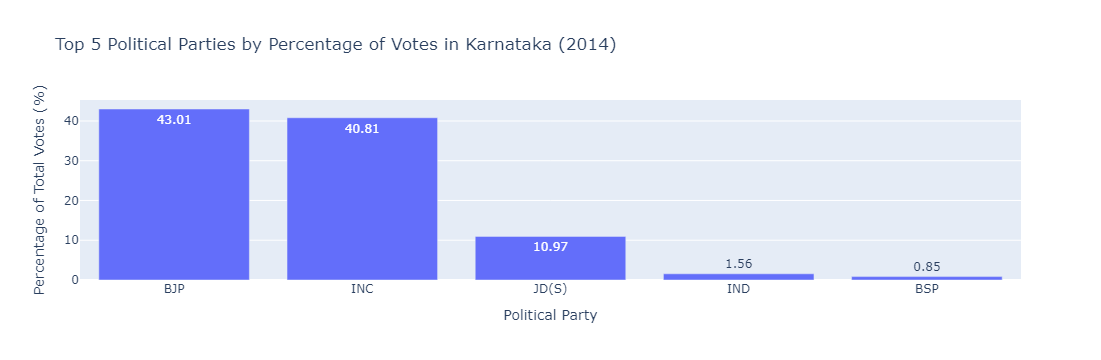

In [79]:
fig = px.bar(top_5_parties_state_2014, 
             x='party', 
             y='% of Vote', 
             text_auto=True,
             title=f'Top 5 Political Parties by Percentage of Votes in {st} (2014)',
             labels={'party': 'Political Party', '% of Vote': 'Percentage of Total Votes (%)'})

fig.show()

In [80]:
df7_2019 = eci_2019[eci_2019['state']==st]
df7_2019 = df7_2019.groupby(['party'])['total_votes'].sum().reset_index()
x = eci_2019[eci_2019['state']==st]['total_votes'].sum()
df7_2019['% of Vote'] = round(df7_2019['total_votes'] * 100 / x,2)
top_5_parties_state_2019 = df7_2019.sort_values(by='% of Vote', ascending=False).head(5)
top_5_parties_state_2019

party  total_votes  % of Vote
13    BJP     18053454      51.38
25    INC     11203016      31.88
29  JD(S)      3397229       9.67
27    IND      1367841       3.89
16    BSP       412382       1.17

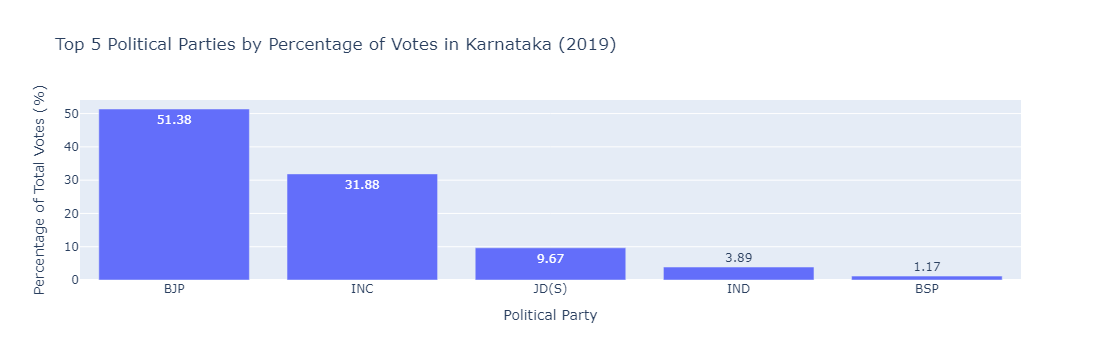

In [81]:
fig = px.bar(top_5_parties_state_2019, 
             x='party', 
             y='% of Vote', 
             text_auto=True,
             title=f'Top 5 Political Parties by Percentage of Votes in {st} (2019)',
             labels={'party': 'Political Party', '% of Vote': 'Percentage of Total Votes (%)'})

fig.show()

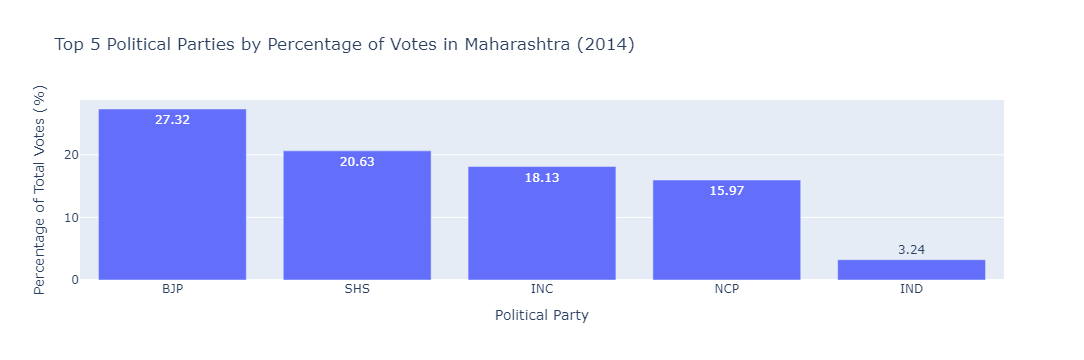

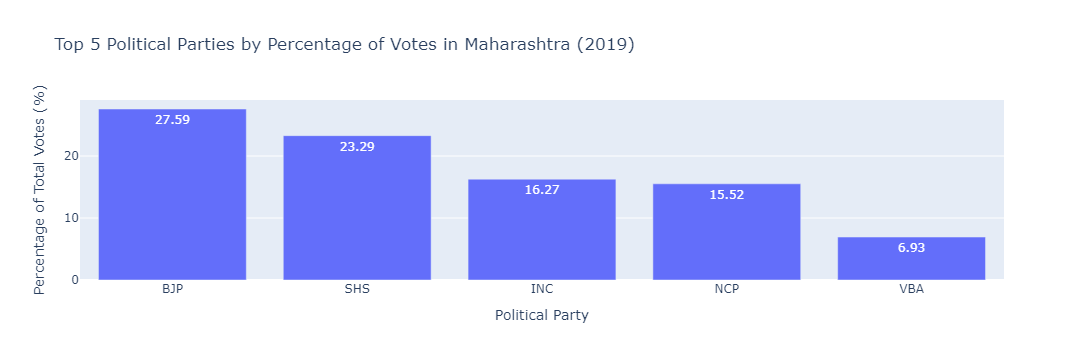

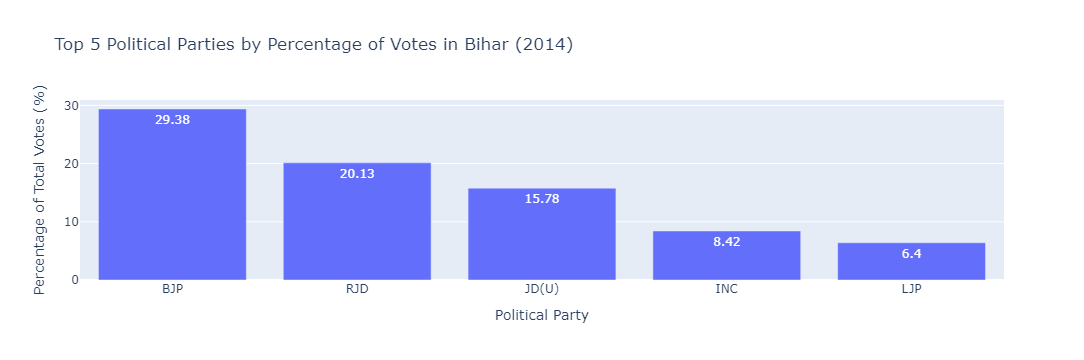

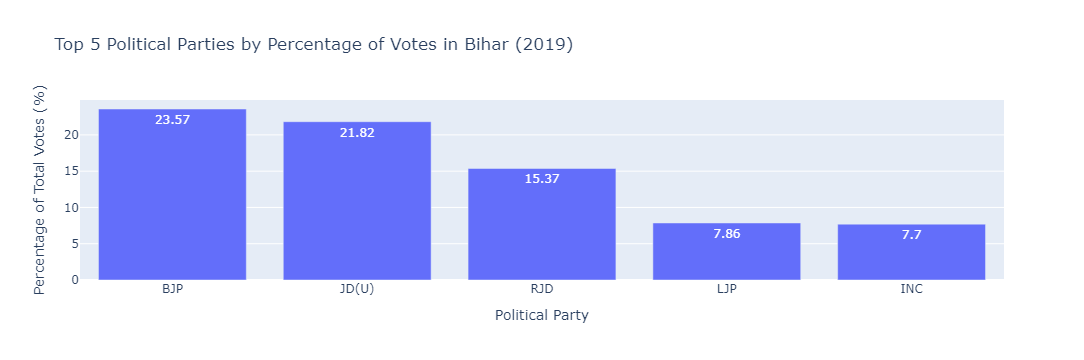

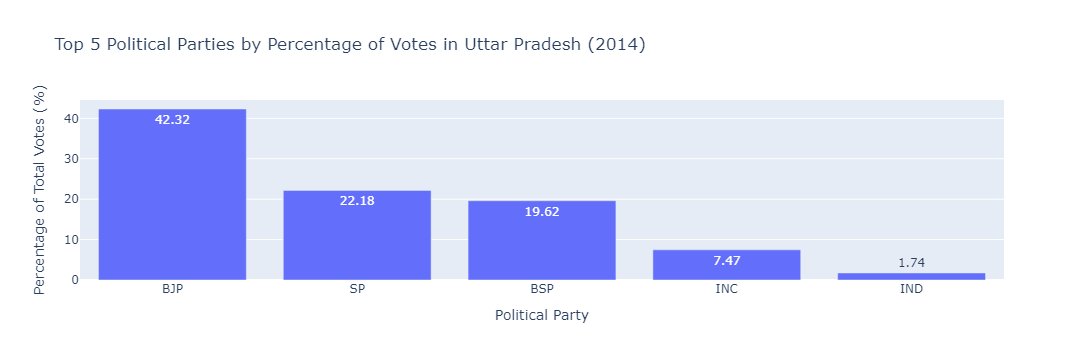

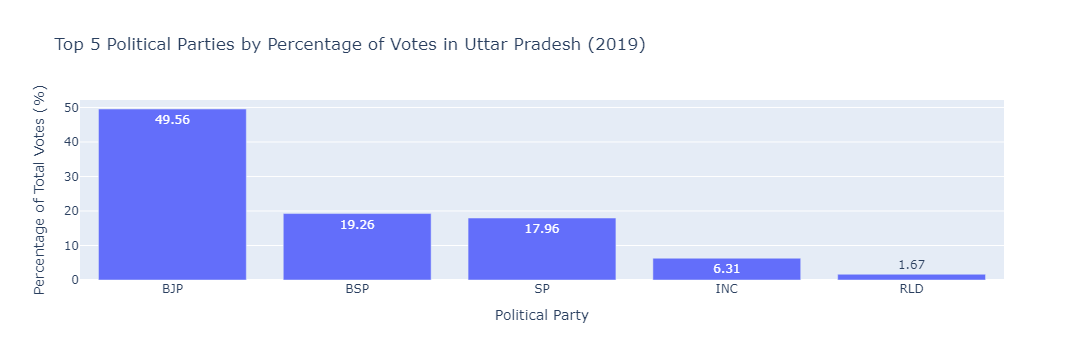

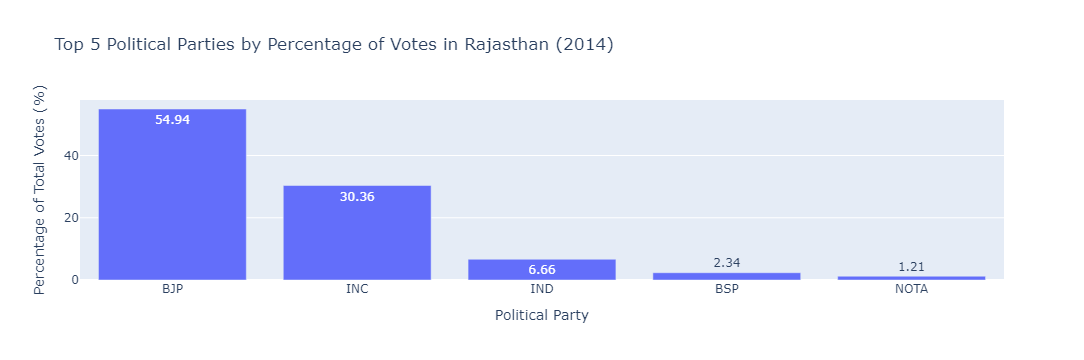

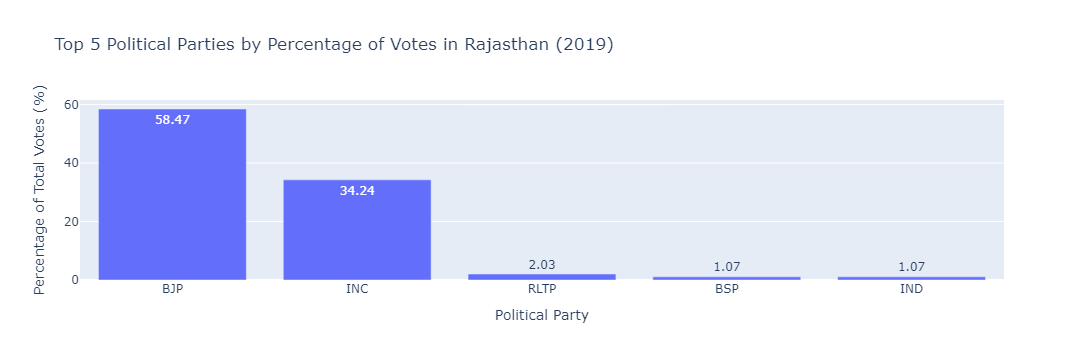

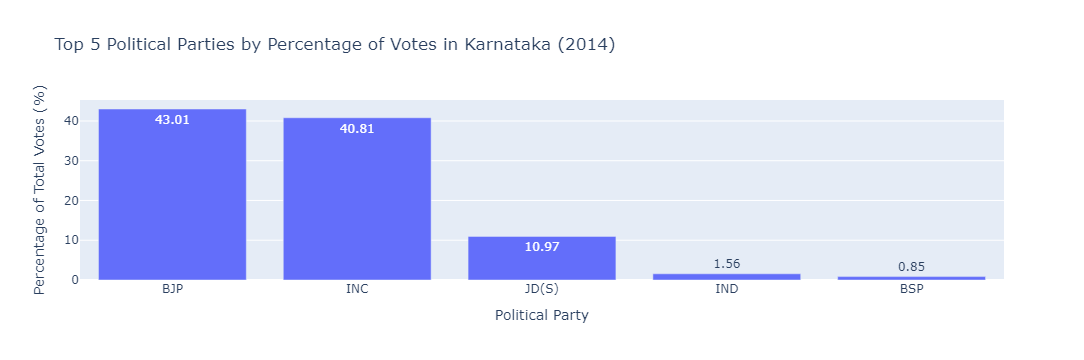

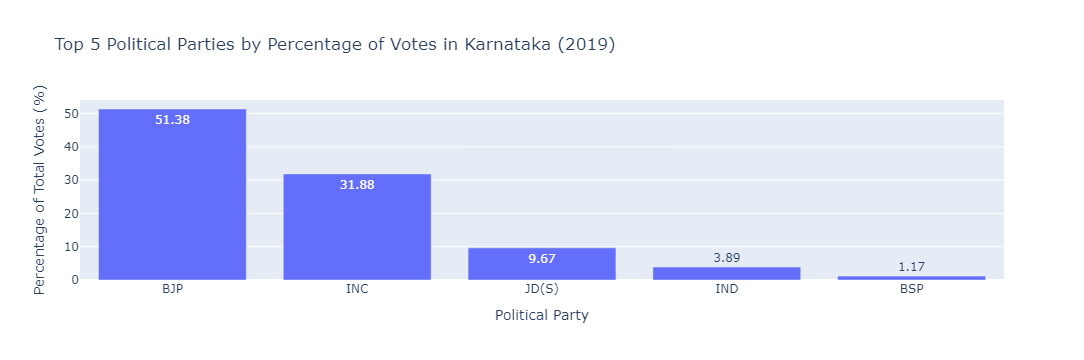

In [82]:
states = ['Maharashtra', 'Bihar', 'Uttar Pradesh', 'Rajasthan', 'Karnataka']

for st in states:
    df7_2014 = eci_2014[eci_2014['state'] == st]
    df7_2014 = df7_2014.groupby(['party'])['total_votes'].sum().reset_index()
    total_votes_2014 = df7_2014['total_votes'].sum()
    df7_2014['% of Vote'] = round(df7_2014['total_votes'] * 100 / total_votes_2014, 2)
    top_5_parties_state_2014 = df7_2014.sort_values(by='% of Vote', ascending=False).head(5)

    fig_2014 = px.bar(top_5_parties_state_2014, 
                      x='party', 
                      y='% of Vote', 
                      text_auto=True,
                      title=f'Top 5 Political Parties by Percentage of Votes in {st} (2014)',
                      labels={'party': 'Political Party', '% of Vote': 'Percentage of Total Votes (%)'})

    fig_2014.show()

    df7_2019 = eci_2019[eci_2019['state'] == st]
    df7_2019 = df7_2019.groupby(['party'])['total_votes'].sum().reset_index()
    total_votes_2019 = df7_2019['total_votes'].sum()
    df7_2019['% of Vote'] = round(df7_2019['total_votes'] * 100 / total_votes_2019, 2)
    top_5_parties_state_2019 = df7_2019.sort_values(by='% of Vote', ascending=False).head(5)

    fig_2019 = px.bar(top_5_parties_state_2019, 
                      x='party', 
                      y='% of Vote', 
                      text_auto=True,
                      title=f'Top 5 Political Parties by Percentage of Votes in {st} (2019)',
                      labels={'party': 'Political Party', '% of Vote': 'Percentage of Total Votes (%)'})

    fig_2019.show()


### List top 5 constituencies for two major national parties where they have gained vote share in 2019 as compared to 2014.

In [84]:
prt = 'BJP'

In [85]:
df8_2014_1 = eci_2014[eci_2014['party']==prt].groupby(['state','pc_name','party'])['total_votes'].sum().reset_index()
df8_2014_1.head()

state                    pc_name party  total_votes
0  Andaman & Nicobar Islands  Andaman & Nicobar Islands   BJP        90969
1             Andhra Pradesh                 Narsapuram   BJP       540306
2             Andhra Pradesh                   Rajampet   BJP       426990
3             Andhra Pradesh                   Tirupati   BJP       542951
4             Andhra Pradesh              Visakhapatnam   BJP       566832

In [86]:
prt_2014 = eci_2014.groupby(['state','pc_name'])['total_votes'].sum().reset_index(name='all_votes_2014')
prt_2014.head()

state                    pc_name  all_votes_2014
0  Andaman & Nicobar Islands  Andaman & Nicobar Islands          190328
1             Andhra Pradesh                 Amalapuram         1120927
2             Andhra Pradesh                 Anakapalli         1148072
3             Andhra Pradesh                  Anantapur         1212145
4             Andhra Pradesh                      Araku          909614

In [87]:
df8_2014_1 = pd.merge(df8_2014_1, prt_2014, on=['state','pc_name'], how='inner')
df8_2014_1['Vote Share (2014)'] = round(df8_2014_1['total_votes'] * 100 / df8_2014_1['all_votes_2014'],2)
df8_2014_1.head()

state                    pc_name party  total_votes  \
0  Andaman & Nicobar Islands  Andaman & Nicobar Islands   BJP        90969   
1             Andhra Pradesh                 Narsapuram   BJP       540306   
2             Andhra Pradesh                   Rajampet   BJP       426990   
3             Andhra Pradesh                   Tirupati   BJP       542951   
4             Andhra Pradesh              Visakhapatnam   BJP       566832   

   all_votes_2014  Vote Share (2014)  
0          190328              47.80  
1         1088947              49.62  
2         1158317              36.86  
3         1213062              44.76  
4         1163558              48.72

In [88]:
df8_2019_1 = eci_2019[eci_2019['party']==prt].groupby(['state','pc_name','party'])['total_votes'].sum().reset_index()
prt_2019 = eci_2019.groupby(['state','pc_name'])['total_votes'].sum().reset_index(name='all_votes_2019')
df8_2019_1 = pd.merge(df8_2019_1, prt_2019, on=['state','pc_name'], how='inner')
df8_2019_1['Vote Share (2019)'] = round(df8_2019_1['total_votes'] * 100 / df8_2019_1['all_votes_2019'],2)
df8_2019_1.head()

state                    pc_name party  total_votes  \
0  Andaman & Nicobar Islands  Andaman & Nicobar Islands   BJP        93901   
1             Andhra Pradesh                 Amalapuram   BJP        11534   
2             Andhra Pradesh                 Anakapalli   BJP        13276   
3             Andhra Pradesh                  Anantapur   BJP         7604   
4             Andhra Pradesh                      Araku   BJP        17867   

   all_votes_2019  Vote Share (2019)  
0          207296              45.30  
1         1232895               0.94  
2         1238491               1.07  
3         1342306               0.57  
4         1074538               1.66

In [89]:
df8 = pd.merge(df8_2014_1, df8_2019_1, on=['state','pc_name'], how='inner')
df8['Change in Vote Share'] = df8['Vote Share (2019)'] - df8['Vote Share (2014)']
df8.head(5)

state                    pc_name party_x  \
0  Andaman & Nicobar Islands  Andaman & Nicobar Islands     BJP   
1             Andhra Pradesh                 Narsapuram     BJP   
2             Andhra Pradesh                   Tirupati     BJP   
3             Andhra Pradesh              Visakhapatnam     BJP   
4          Arunachal Pradesh             Arunachal East     BJP   

   total_votes_x  all_votes_2014  Vote Share (2014) party_y  total_votes_y  \
0          90969          190328              47.80     BJP          93901   
1         540306         1088947              49.62     BJP          12414   
2         542951         1213062              44.76     BJP          16125   
3         566832         1163558              48.72     BJP          33892   
4         105977          261291              40.56     BJP         153883   

   all_votes_2019  Vote Share (2019)  Change in Vote Share  
0          207296              45.30                 -2.50  
1         1177738               1.05                -48.57  
2         1313515               1.23                -43.53  
3         1239754               2.73                -45.99  
4          293781              52.38                 11.82

In [90]:
df8.sort_values(by='Change in Vote Share', ascending=False).head(5)

state       pc_name party_x  total_votes_x  all_votes_2014  \
240      Tripura  Tripura West     BJP          54706         1072749   
359  West Bengal       Purulia     BJP          86236         1204675   
239      Tripura  Tripura East     BJP          60613          951080   
361  West Bengal      Ranaghat     BJP         233670         1353196   
349  West Bengal      Jhargram     BJP         122459         1257613   

     Vote Share (2014) party_y  total_votes_y  all_votes_2019  \
240               5.10     BJP         573532         1107755   
359               7.16     BJP         668107         1355236   
239               6.37     BJP         482126         1045417   
361              17.27     BJP         783253         1484035   
349               9.74     BJP         626583         1406214   

     Vote Share (2019)  Change in Vote Share  
240              51.77                 46.67  
359              49.30                 42.14  
239              46.12                 39.75  
361              52.78                 35.51  
349              44.56                 34.82

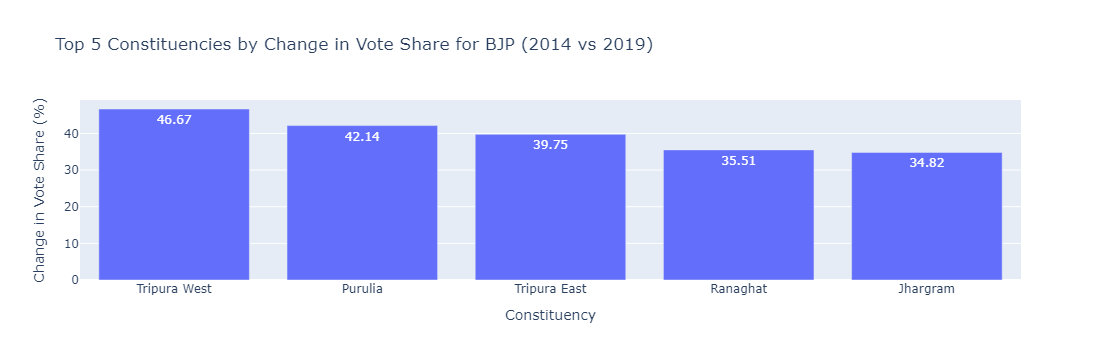

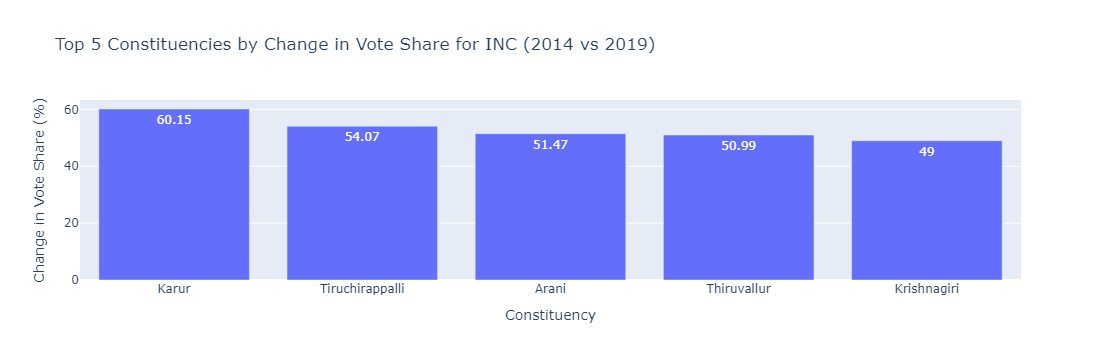

In [91]:
prt = ["BJP", "INC"]

for pr in prt:
    df8_2014_1 = eci_2014[eci_2014['party'] == pr].groupby(['state', 'pc_name', 'party'])['total_votes'].sum().reset_index()
    prt_2014 = eci_2014.groupby(['state', 'pc_name'])['total_votes'].sum().reset_index(name='all_votes_2014')
    df8_2014_1 = pd.merge(df8_2014_1, prt_2014, on=['state', 'pc_name'], how='inner')
    df8_2014_1['Vote Share (2014)'] = round(df8_2014_1['total_votes'] * 100 / df8_2014_1['all_votes_2014'], 2)

    df8_2019_1 = eci_2019[eci_2019['party'] == pr].groupby(['state', 'pc_name', 'party'])['total_votes'].sum().reset_index()
    prt_2019 = eci_2019.groupby(['state', 'pc_name'])['total_votes'].sum().reset_index(name='all_votes_2019')
    df8_2019_1 = pd.merge(df8_2019_1, prt_2019, on=['state', 'pc_name'], how='inner')
    df8_2019_1['Vote Share (2019)'] = round(df8_2019_1['total_votes'] * 100 / df8_2019_1['all_votes_2019'], 2)

    df8 = pd.merge(df8_2014_1, df8_2019_1, on=['state', 'pc_name', 'party'], how='inner')
    df8['Change in Vote Share'] = df8['Vote Share (2019)'] - df8['Vote Share (2014)']

    top_5_vote_share_change = df8.sort_values(by='Change in Vote Share', ascending=False).head(5)

    fig = px.bar(top_5_vote_share_change,
                 x='pc_name',
                 y='Change in Vote Share',
                 text_auto=True,
                 title=f'Top 5 Constituencies by Change in Vote Share for {pr} (2014 vs 2019)',
                 labels={'pc_name': 'Constituency', 'Change in Vote Share': 'Change in Vote Share (%)', 'state': 'State'})

    fig.show()


### List top 5 constituencies for two major national parties where they have lost vote share in 2019 as compared to 2014.

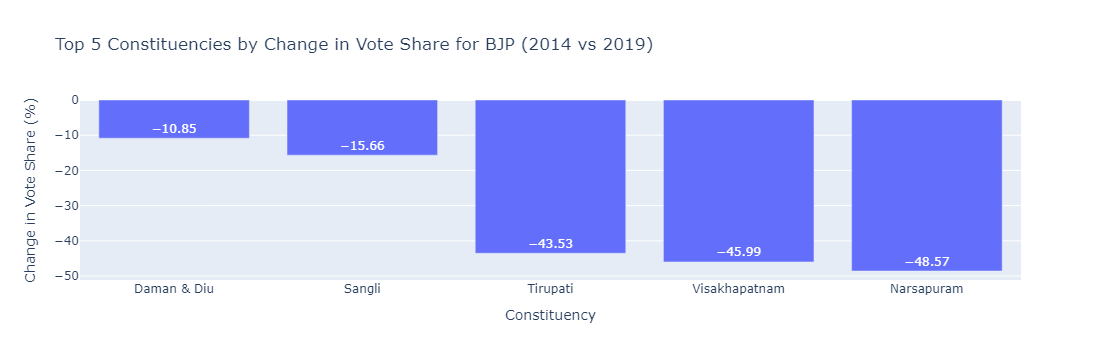

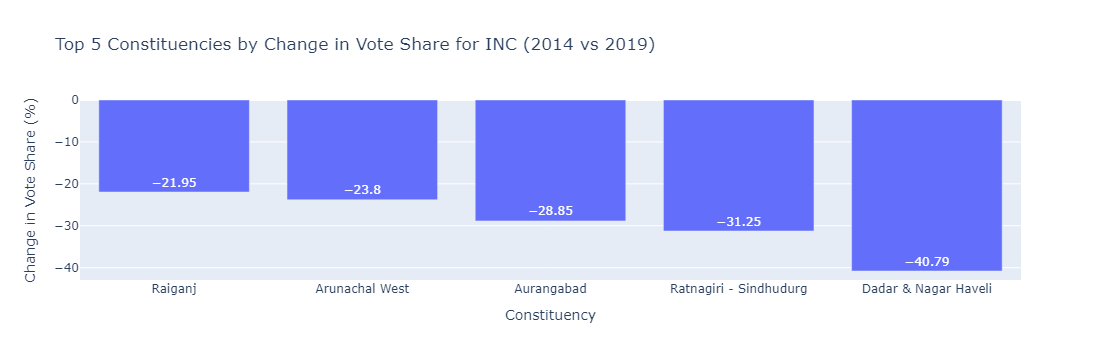

In [93]:
prt = ["BJP", "INC"]

for pr in prt:
    df8_2014_1 = eci_2014[eci_2014['party'] == pr].groupby(['state', 'pc_name', 'party'])['total_votes'].sum().reset_index()
    prt_2014 = eci_2014.groupby(['state', 'pc_name'])['total_votes'].sum().reset_index(name='all_votes_2014')
    df8_2014_1 = pd.merge(df8_2014_1, prt_2014, on=['state', 'pc_name'], how='inner')
    df8_2014_1['Vote Share (2014)'] = round(df8_2014_1['total_votes'] * 100 / df8_2014_1['all_votes_2014'], 2)

    df8_2019_1 = eci_2019[eci_2019['party'] == pr].groupby(['state', 'pc_name', 'party'])['total_votes'].sum().reset_index()
    prt_2019 = eci_2019.groupby(['state', 'pc_name'])['total_votes'].sum().reset_index(name='all_votes_2019')
    df8_2019_1 = pd.merge(df8_2019_1, prt_2019, on=['state', 'pc_name'], how='inner')
    df8_2019_1['Vote Share (2019)'] = round(df8_2019_1['total_votes'] * 100 / df8_2019_1['all_votes_2019'], 2)

    df8 = pd.merge(df8_2014_1, df8_2019_1, on=['state', 'pc_name', 'party'], how='inner')
    df8['Change in Vote Share'] = df8['Vote Share (2019)'] - df8['Vote Share (2014)']

    top_5_vote_share_change = df8.sort_values(by='Change in Vote Share', ascending=False).tail(5)

    fig = px.bar(top_5_vote_share_change,
                 x='pc_name',
                 y='Change in Vote Share',
                 text_auto=True,
                 title=f'Top 5 Constituencies by Change in Vote Share for {pr} (2014 vs 2019)',
                 labels={'pc_name': 'Constituency', 'Change in Vote Share': 'Change in Vote Share (%)', 'state': 'State'})

    fig.show()


### Which constituency has voted the most for NOTA?

In [95]:
nota_votes_2014 = eci_2014[eci_2014['party'] == 'NOTA']
top_5_nota = nota_votes_2014.sort_values(by='total_votes', ascending=False).head(5)
top_5_nota

state          pc_name          candidate  sex  age category  \
5416      Tamil Nadu         Nilgiris  None Of The Above    M  NaN      NaN   
4915       Rajasthan         Banswara  None Of The Above  NaN  NaN      NaN   
1776         Gujarat            Dahod  None Of The Above  NaN  NaN      NaN   
3315  Madhya Pradesh           Ratlam  None Of The Above  NaN  NaN      NaN   
1201           Bihar  Samastipur (sc)  None Of The Above  NaN  NaN      NaN   

     party party_symbol  general_votes  postal_votes  total_votes  \
5416  NOTA         NOTA          46495            64        46559   
4915  NOTA         NOTA          34389            15        34404   
1776  NOTA         NOTA          32268            37        32305   
3315  NOTA         NOTA          30344            20        30364   
1201  NOTA         NOTA          29211             0        29211   

      total_electors  vote_rank  
5416         1269173        3.0  
4915         1698244        3.0  
1776         1411765        3.0  
3315         1702576        3.0  
1201         1504451        4.0

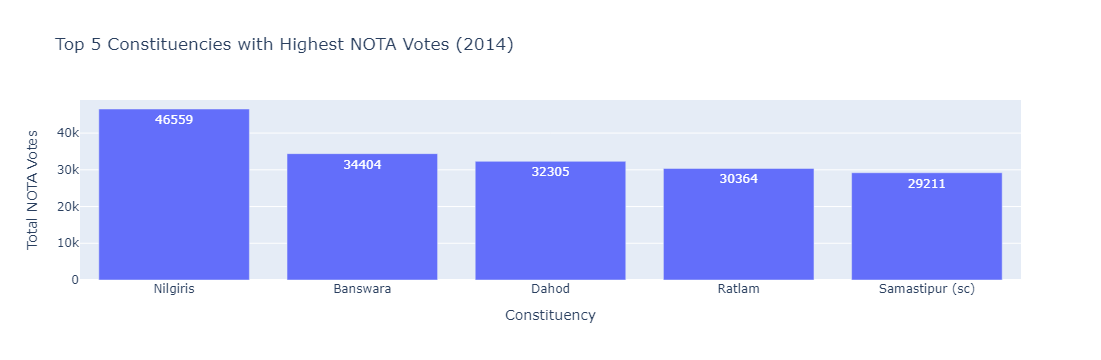

In [96]:
fig = px.bar(
    top_5_nota,
    x='pc_name',  # Assuming 'pc_name' is the name of the constituency
    y='total_votes',
    title='Top 5 Constituencies with Highest NOTA Votes (2014)',
    labels={'pc_name': 'Constituency', 'total_votes': 'Total NOTA Votes'},
    text='total_votes'
)

fig.update_layout(xaxis_title='Constituency', yaxis_title='Total NOTA Votes')

fig.show()

In [97]:
nota_votes_2019 = eci_2019[eci_2019['party'] == 'NOTA']
top_5_nota_2019 = nota_votes_2019.sort_values(by='total_votes', ascending=False).head(5)
top_5_nota_2019

state            pc_name candidate  sex  age category party  \
798            Bihar     Gopalganj (sc)      Nota  NaN  NaN      NaN  NOTA   
10    Andhra Pradesh              Araku      Nota  NaN  NaN      NaN  NOTA   
540            Bihar  Paschim Champaran      Nota  NaN  NaN      NaN  NOTA   
4248          Odisha        Nabarangpur      Nota  NaN  NaN      NaN  NOTA   
7559    Chhattisgarh             Bastar      Nota  NaN  NaN      NaN  NOTA   

     party_symbol  general_votes  postal_votes  total_votes  total_electors  \
798           NaN          51565            95        51660         1839514   
10            NaN          47955            22        47977         1451418   
540           NaN          45637            62        45699         1633824   
4248          NaN          44580             2        44582         1461004   
7559          NaN          41656            11        41667         1379122   

      vote_rank  
798         3.0  
10          3.0  
540         3.0  
4248        4.0  
7559        3.0

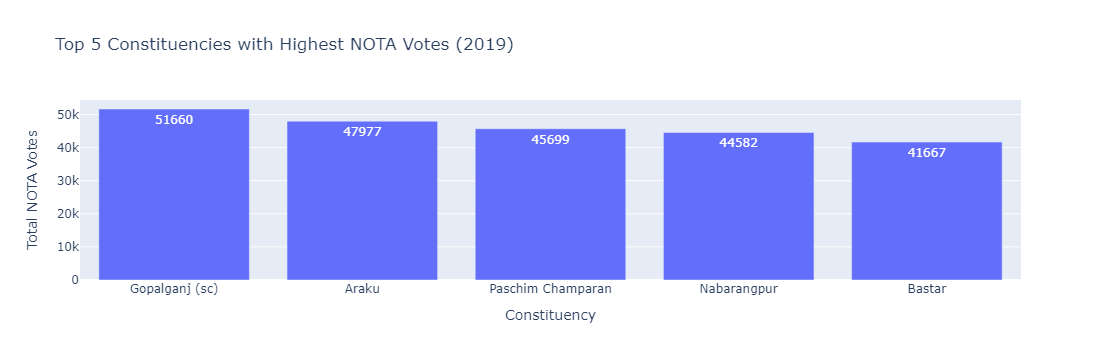

In [98]:
fig = px.bar(
    top_5_nota_2019,
    x='pc_name',
    y='total_votes',
    title='Top 5 Constituencies with Highest NOTA Votes (2019)',
    labels={'pc_name': 'Constituency', 'total_votes': 'Total NOTA Votes'},
    text='total_votes'
)

fig.update_layout(xaxis_title='Constituency', yaxis_title='Total NOTA Votes')

fig.show()

### Which constituencies have elected candidates whose party has less than 10% vote share at state level in 2019?

In [100]:
df11_2019 = eci_2019[eci_2019['vote_rank']==1]
df11_2019.head()

state        pc_name                       candidate     sex  \
2   Andhra Pradesh          Araku                Goddeti. Madhavi  FEMALE   
11  Andhra Pradesh     Srikakulam       Kinjarapu Ram Mohan Naidu    MALE   
23  Andhra Pradesh   Vizianagaram          Bellana Chandra Sekhar    MALE   
39  Andhra Pradesh  Visakhapatnam             M V V Satyanarayana    MALE   
53  Andhra Pradesh     Anakapalli  Dr.beesetti Venkata Satyavathi  FEMALE   

     age category  party party_symbol  general_votes  postal_votes  \
2   26.0       ST  YSRCP  Ceiling Fan         557561          4629   
11  32.0  GENERAL    TDP      Bicycle         529213          5331   
23  57.0  GENERAL  YSRCP  Ceiling Fan         573466          4952   
39  52.0  GENERAL  YSRCP  Ceiling Fan         433968          2938   
53  52.0  GENERAL  YSRCP  Ceiling Fan         583210          3016   

    total_votes  total_electors  vote_rank  
2        562190         1451418        1.0  
11       534544         1553860        1.0  
23       578418         1503980        1.0  
39       436906         1829300        1.0  
53       586226         1521363        1.0

In [101]:
df11_party = eci_2019.groupby(['state','party'])['total_votes'].sum().reset_index()
df11_party.head()

state   party  total_votes
0  Andaman & Nicobar Islands    AAAP         2839
1  Andaman & Nicobar Islands  AINHCP          212
2  Andaman & Nicobar Islands    AITC         1721
3  Andaman & Nicobar Islands     BJP        93901
4  Andaman & Nicobar Islands     BSP         2486

In [102]:
df11_state = eci_2019.groupby(['state'])['total_votes'].sum().reset_index(name='all_votes')
df11_state.head()

state  all_votes
0  Andaman & Nicobar Islands     207296
1             Andhra Pradesh   31612534
2          Arunachal Pradesh     652091
3                      Assam   17986066
4                      Bihar   40806661

In [103]:
df11_party = pd.merge(df11_party, df11_state, on='state', how='inner')
df11_party['% of Vote Share'] = round(df11_party['total_votes'] * 100 / df11_party['all_votes'],2)
df11_party.head()

state   party  total_votes  all_votes  % of Vote Share
0  Andaman & Nicobar Islands    AAAP         2839     207296             1.37
1  Andaman & Nicobar Islands  AINHCP          212     207296             0.10
2  Andaman & Nicobar Islands    AITC         1721     207296             0.83
3  Andaman & Nicobar Islands     BJP        93901     207296            45.30
4  Andaman & Nicobar Islands     BSP         2486     207296             1.20

In [104]:
df11_2019 = pd.merge(df11_2019, df11_party, on=['state','party'], how='inner')[['state','pc_name','candidate','party','% of Vote Share']]
df11_2019.head()

state        pc_name                       candidate  party  \
0  Andhra Pradesh          Araku                Goddeti. Madhavi  YSRCP   
1  Andhra Pradesh     Srikakulam       Kinjarapu Ram Mohan Naidu    TDP   
2  Andhra Pradesh   Vizianagaram          Bellana Chandra Sekhar  YSRCP   
3  Andhra Pradesh  Visakhapatnam             M V V Satyanarayana  YSRCP   
4  Andhra Pradesh     Anakapalli  Dr.beesetti Venkata Satyavathi  YSRCP   

   % of Vote Share  
0            49.15  
1            39.59  
2            49.15  
3            49.15  
4            49.15

In [105]:
df11_2019_10 = df11_2019[df11_2019['% of Vote Share']<10].sort_values(by=['% of Vote Share', 'pc_name'], ascending=[False,True]).head(10)
df11_2019_10

state       pc_name                     candidate  party  \
144        Karnataka        Hassan               Prajwal Revanna  JD(S)   
281           Punjab     Gurdaspur                    Sunny Deol    BJP   
285           Punjab    Hoshiarpur                   Som Parkash    BJP   
125  Jammu & Kashmir      Anantnag               Hasnain Masoodi    JKN   
123  Jammu & Kashmir     Baramulla           Mohammad Akbar Lone    JKN   
124  Jammu & Kashmir      Srinagar               Farooq Abdullah    JKN   
61             Bihar  Hajipur (sc)        Pashu Pati Kumar Paras    LJP   
80             Bihar    Jamui (sc)           Chirag Kumar Paswan    LJP   
65             Bihar      Khagaria  Choudhary Mehboob Ali Kaiser    LJP   
79             Bihar        Nawada                 Chandan Singh    LJP   

     % of Vote Share  
144             9.67  
281             9.63  
285             9.63  
125             7.89  
123             7.89  
124             7.89  
61              7.86  
80              7.86  
65              7.86  
79              7.86

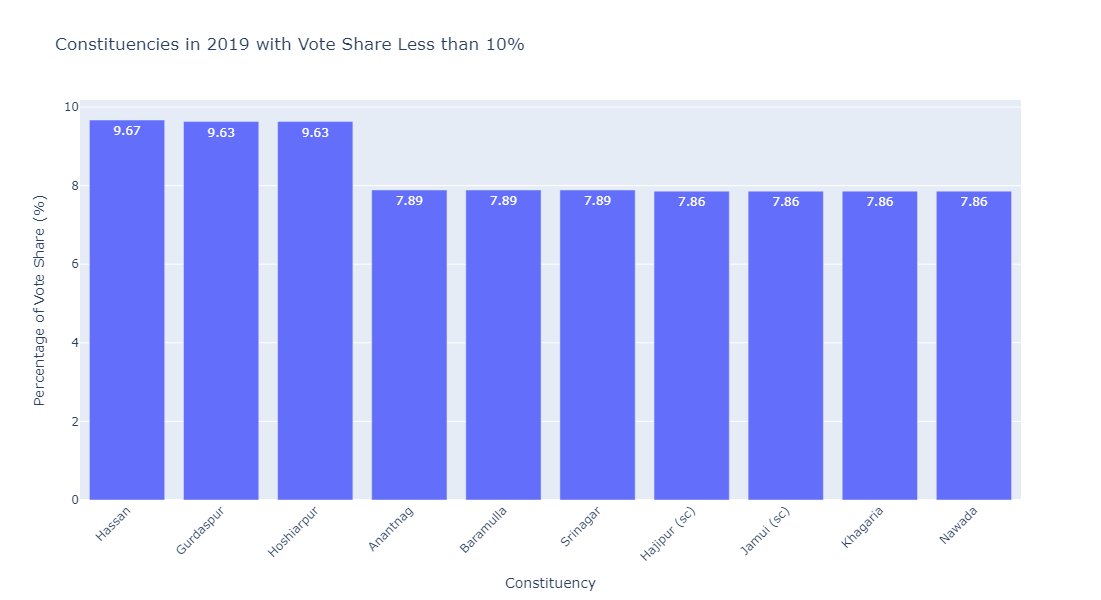

In [106]:
fig = px.bar(df11_2019_10, 
             x='pc_name', 
             y='% of Vote Share', 
             text_auto=True,
             title='Constituencies in 2019 with Vote Share Less than 10%',
             labels={'pc_name': 'Constituency', '% of Vote Share': 'Percentage of Vote Share (%)','Party':'party'},
            hover_data=['party','state'])

fig.update_layout(
    xaxis_title='Constituency',
    yaxis_title='Percentage of Vote Share (%)',
    xaxis_tickangle=-45,
    height=600
)

fig.show()

### Is there a correlation between postal votes % and voter turnout %?

In [108]:
df_pv_vt = pd.read_csv('pv vt.csv')
df_pv_vt.head()

State Parliamentry Constituency  Postal_Votes  Voters_TurnOut
0  Andhra Pradesh                     Araku          0.70           74.03
1  Andhra Pradesh                Srikakulam          1.24           74.48
2  Andhra Pradesh              Vizianagaram          0.74           80.98
3  Andhra Pradesh             Visakhapatnam          0.54           67.77
4  Andhra Pradesh                Anakapalli          0.45           81.41

Correlation between Postal Votes % and Voter Turnout %: 0.002507849452227382


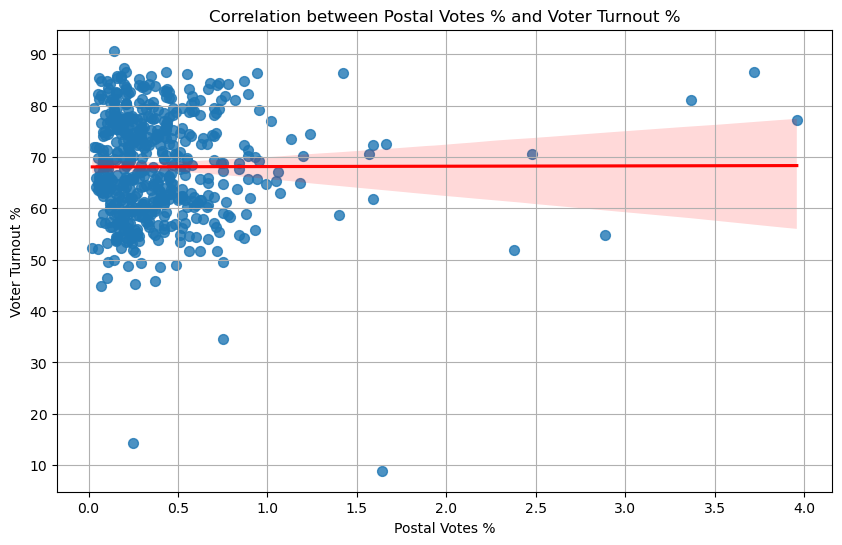

In [109]:
correlation = df_pv_vt['Postal_Votes'].corr(df_pv_vt['Voters_TurnOut'])
print(f'Correlation between Postal Votes % and Voter Turnout %: {correlation}')

plt.figure(figsize=(10, 6))
sns.regplot(x='Postal_Votes', y='Voters_TurnOut', data=df_pv_vt, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlation between Postal Votes % and Voter Turnout %')
plt.xlabel('Postal Votes %')
plt.ylabel('Voter Turnout %')
plt.grid(True)
plt.show()


#### A correlation coefficient of 0.0025 indicates that there is virtually no linear relationship between the percentage of postal votes and voter turnout percentage. This near-zero value suggests that changes in postal vote percentages do not have a significant impact on the overall voter turnout percentage.

#### Interpretation:
#### No Correlation: The very low correlation implies that the factors affecting postal votes and voter turnout are largely independent of each other. In other words, an increase or decrease in postal votes does not predictably influence the voter turnout percentage.

### Is there any correlation between GDP of a state and voter turnout % ??
### Is there any correlation between literacy % of a state and voter turnout %?

In [112]:
df_gsdp_vt = pd.read_csv('gsdp, lr, vt.csv')
df_gsdp_vt.head()

State  Voter Turnout  Male Literacy Rate  Female Literacy Rate  \
0     Andhra Pradesh          80.22                  76                    60   
1  Arunachal Pradesh          81.15                  74                    58   
2              Assam          81.57                  79                    67   
3              Bihar          57.30                  71                    52   
4                Goa          75.10                  93                    85   

   Total Literacy Rate        GSDP  
0                   67  92583912.0  
1                   65   3002365.0  
2                   72  34685068.0  
3                   62  58185548.0  
4                   89   7503209.0

In [113]:
df_gsdp_vt.columns

Index(['State', 'Voter Turnout', 'Male Literacy Rate', 'Female Literacy Rate',
       'Total Literacy Rate', 'GSDP'],
      dtype='object')

Correlation between GSDP and Voter Turnout: -0.28352692278589187


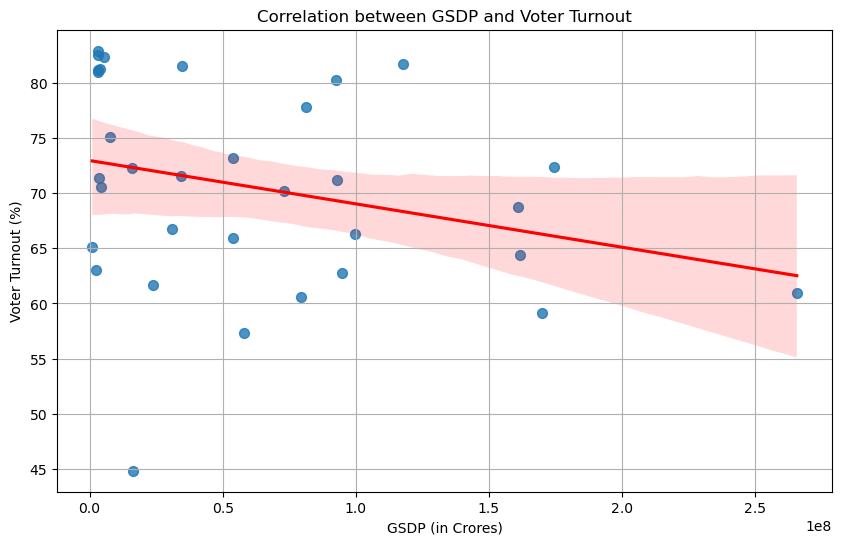

Correlation between Male Literacy Rate and Voter Turnout: 0.27635477711858175


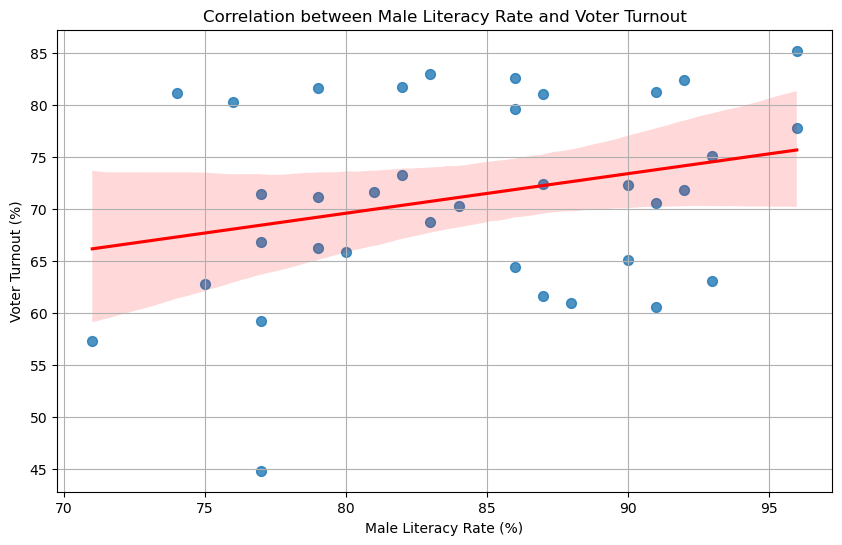

Correlation between Female Literacy Rate and Voter Turnout: 0.3454372927114068


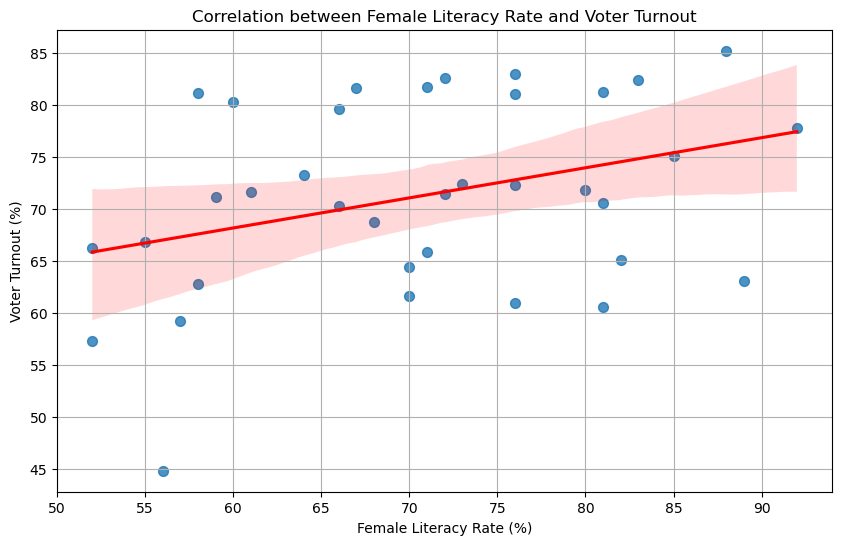

Correlation between Total Literacy Rate and Voter Turnout: 0.29342044851774013


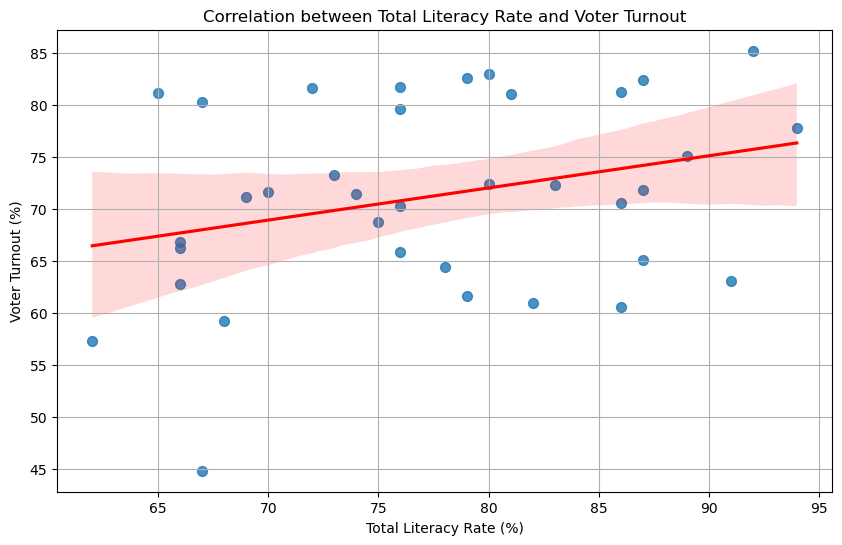

In [114]:
correlation_gsdp_vt = df_gsdp_vt['GSDP'].corr(df_gsdp_vt['Voter Turnout'])
correlation_male_lit_vt = df_gsdp_vt['Male Literacy Rate'].corr(df_gsdp_vt['Voter Turnout'])
correlation_female_lit_vt = df_gsdp_vt['Female Literacy Rate'].corr(df_gsdp_vt['Voter Turnout'])
correlation_total_lit_vt = df_gsdp_vt['Total Literacy Rate'].corr(df_gsdp_vt['Voter Turnout'])

# Print results
print(f'Correlation between GSDP and Voter Turnout: {correlation_gsdp_vt}')

plt.figure(figsize=(10, 6))
sns.regplot(x='GSDP', y='Voter Turnout', data=df_gsdp_vt, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlation between GSDP and Voter Turnout')
plt.xlabel('GSDP (in Crores)')
plt.ylabel('Voter Turnout (%)')
plt.grid(True)
plt.show()


print(f'Correlation between Male Literacy Rate and Voter Turnout: {correlation_male_lit_vt}')
plt.figure(figsize=(10, 6))
sns.regplot(x='Male Literacy Rate', y='Voter Turnout', data=df_gsdp_vt, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlation between Male Literacy Rate and Voter Turnout')
plt.xlabel('Male Literacy Rate (%)')
plt.ylabel('Voter Turnout (%)')
plt.grid(True)
plt.show()


print(f'Correlation between Female Literacy Rate and Voter Turnout: {correlation_female_lit_vt}')

plt.figure(figsize=(10, 6))
sns.regplot(x='Female Literacy Rate', y='Voter Turnout', data=df_gsdp_vt, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlation between Female Literacy Rate and Voter Turnout')
plt.xlabel('Female Literacy Rate (%)')
plt.ylabel('Voter Turnout (%)')
plt.grid(True)
plt.show()


print(f'Correlation between Total Literacy Rate and Voter Turnout: {correlation_total_lit_vt}')

plt.figure(figsize=(10, 6))
sns.regplot(x='Total Literacy Rate', y='Voter Turnout', data=df_gsdp_vt, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlation between Total Literacy Rate and Voter Turnout')
plt.xlabel('Total Literacy Rate (%)')
plt.ylabel('Voter Turnout (%)')
plt.grid(True)
plt.show()



In [115]:
print(f'Correlation between GSDP and Voter Turnout: {correlation_gsdp_vt}')
print(f'Correlation between Male Literacy Rate and Voter Turnout: {correlation_male_lit_vt}')
print(f'Correlation between Female Literacy Rate and Voter Turnout: {correlation_female_lit_vt}')
print(f'Correlation between Total Literacy Rate and Voter Turnout: {correlation_total_lit_vt}')

Correlation between GSDP and Voter Turnout: -0.28352692278589187
Correlation between Male Literacy Rate and Voter Turnout: 0.27635477711858175
Correlation between Female Literacy Rate and Voter Turnout: 0.3454372927114068
Correlation between Total Literacy Rate and Voter Turnout: 0.29342044851774013


#### GSDP and Voter Turnout (-0.284):

#### Reason: A negative correlation between GSDP (Gross State Domestic Product) and voter turnout might suggest that higher economic development or prosperity is associated with lower voter turnout. This could be due to increased satisfaction with the current state of affairs or a sense that elections are less critical in a more economically stable environment. However, this correlation is weak, so the relationship is not very strong.

#### Male Literacy Rate and Voter Turnout (0.276):

#### Reason: A positive correlation between male literacy rate and voter turnout suggests that as literacy rates among males increase, voter turnout also tends to increase. Higher literacy may lead to better awareness of voting rights and political processes, encouraging more men to participate in elections. This correlation is also weak, indicating a modest relationship.

#### Female Literacy Rate and Voter Turnout (0.345):

#### Reason: A moderate positive correlation here indicates that as female literacy rates increase, voter turnout tends to rise. Educated women are more likely to understand the importance of voting and be motivated to participate. This correlation is stronger compared to male literacy, suggesting that female literacy has a more significant impact on voter turnout.